**Inisiasi Folder**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
default_dir = "/content/drive/MyDrive/Colab Notebooks/thesis_umar"
os.chdir(default_dir)

Mounted at /content/drive


**Inisiasi library**

In [48]:
!pip install scikeras
!pip install optuna
!pip install ydata_profiling
!pip install mlxtend

In [3]:
import warnings
warnings.filterwarnings('ignore')

# for some basic operations
import numpy as np
import pandas as pd

#for visualizations
import matplotlib.pyplot as plt
import math
import seaborn as sns
from pandas import plotting
import matplotlib.style as style
style.use("fivethirtyeight")
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
%matplotlib inline
import missingno as msno

# from pandas_profiling import ProfileReport
from pandas.plotting import parallel_coordinates
from IPython.display import display, Markdown

# for providing path
import os

# for modelling
import sklearn
from sklearn.model_selection import train_test_split
#import imblearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

#Regularization
from helper_function import reg_coef, reg_ridge_lasso, reg_elastic, plot_coef, make_sine
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# set seaborn styles
sns.set(style="whitegrid")

#for Feature selection
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import StratifiedKFold

# for model preparation
import sklearn
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, accuracy_score
from mlxtend.plotting import plot_confusion_matrix

#for modelling
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
import optuna
from optuna.samplers import TPESampler

#Evaluation
from sklearn.metrics import confusion_matrix,RocCurveDisplay, classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#Save model
import joblib
import warnings
import pickle
from keras.models import save_model
from keras.models import load_model
warnings.filterwarnings('ignore')

**Inisiasi Dataset**

In [4]:
df = pd.read_excel('dataset_UAI.xlsx')
df_00 = pd.read_excel('dataset_UAI.xlsx')

# Statistik Deskriptif

In [5]:
def describe_detail(df):
    # Display function with Markdown for titles
    def display_markdown(title):
        display(Markdown(f"**{title}**"))

    # (a) First five data points
    display_markdown('First five data points')
    display(df.head())
    print('\n')

    # (b) Random five data points
    display_markdown('Random five data points')
    display(df.sample(5))
    print('\n')

    # (c) Last five data points
    display_markdown('Last five data points')
    display(df.tail())
    print('\n')

    # (d) Shape and Size of data set
    shape_size_df = pd.DataFrame({'Shape': [df.shape], 'Size': [df.size]})
    display_markdown('Shape and Size of dataset')
    display(shape_size_df)
    print('\n')

    # (e) Data types
    data_types_df = pd.DataFrame(df.dtypes, columns=['Data Type'])
    display_markdown('Data types of columns')
    display(data_types_df)
    print('\n')

    # (f) Numerical features in the dataset
    numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
    if numerical_features:
        display_markdown('Numerical features in the dataset')
        display(numerical_features)
        print('\n')

    # (g) Categorical features in the dataset
    categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
    if categorical_features:
        display_markdown('Categorical features in the dataset')
        display(categorical_features)
        print('\n')
    else:
        print("Tidak terdapat data bertipe object/category\n")

    # (h) Statistical Description of Columns
    if numerical_features:
        display_markdown('Statistical Description of Numerical Columns')
        display(df.describe().T)
        print('\n')

    # (i) Description of Categorical features
    if categorical_features:
        display_markdown('Description of Categorical Features')
        display(df.describe(include=['object', 'category']))
        print('\n')

    # (j) Unique class count of Categorical features
    if categorical_features:
        unique_counts_df = pd.DataFrame(df[categorical_features].nunique(), columns=['Unique Count'])
        display_markdown('Unique class count of Categorical features')
        display(unique_counts_df)
        print('\n')

    # (k) Missing values in data
    missing_values_df = pd.DataFrame(df.isnull().sum(), columns=['Missing Values'])
    missing_values_df = missing_values_df[missing_values_df['Missing Values'] > 0]
    if not missing_values_df.empty:
        display_markdown('Missing values in data')
        display(missing_values_df)
    else:
        print("No missing values found.")

# Assuming 'df' is your DataFrame
describe_detail(df)

**First five data points**

1_Ccourse  2_CCourse_good  3_TOEFL_score  4_College_time  5_GPA  \
0        147             147            470               9   3.16   
1         19              19              0               6   2.58   
2        147             147            453               8   3.46   
3        141             141            390              14   3.74   
4        147             147            530               7   3.74   

   6_Academic_Leave  7_domicile  8_work  9_live_with_family  10_faculty  \
0                 0           4       1                   1           4   
1                 5           3       2                   2           4   
2                 0           4       1                   1           4   
3                 0           3       1                   2           4   
4                 0           4       1                   1           4   

   11_class  12_departement  status  
0      2016              42       2  
1      2016              42       1  
2      2016              42       2  
3      2016              42       1  
4      2016              42       2

**Random five data points**

1_Ccourse  2_CCourse_good  3_TOEFL_score  4_College_time  5_GPA  \
1186        146             146            460               7   3.72   
1557        155             144            397              14   2.72   
1463        148             148            487               7   3.83   
294         144             144            407              10   2.99   
516         147             147            450               9   3.13   

      6_Academic_Leave  7_domicile  8_work  9_live_with_family  10_faculty  \
1186                 0           2       1                   2           3   
1557                 5           5       1                   1           1   
1463                 0           4       1                   1           1   
294                  0           4       1                   1           4   
516                  0           4       1                   1           4   

      11_class  12_departement  status  
1186      2016              33       2  
1557      2015              12       1  
1463      2015              11       2  
294       2015              42       2  
516       2014              42       2

**Last five data points**

1_Ccourse  2_CCourse_good  3_TOEFL_score  4_College_time  5_GPA  \
1778         41              27            420               8   2.17   
1779        144             144            473               8   3.30   
1780         36               7              0               4   0.56   
1781         54              44              0               6   2.41   
1782        147             147            493               8   3.41   

      6_Academic_Leave  7_domicile  8_work  9_live_with_family  10_faculty  \
1778                 5           5       2                   2           6   
1779                 0           4       1                   1           6   
1780                 3           3       2                   2           6   
1781                 3           3       1                   1           6   
1782                 0           4       1                   1           6   

      11_class  12_departement  status  
1778      2015              64       1  
1779      2015              64       2  
1780      2015              64       1  
1781      2015              64       1  
1782      2015              64       2

**Shape and Size of dataset**

Shape   Size
0  (1783, 13)  23179

**Data types of columns**

Data Type
1_Ccourse              int64
2_CCourse_good         int64
3_TOEFL_score          int64
4_College_time         int64
5_GPA                float64
6_Academic_Leave       int64
7_domicile             int64
8_work                 int64
9_live_with_family     int64
10_faculty             int64
11_class               int64
12_departement         int64
status                 int64

**Numerical features in the dataset**

['1_Ccourse',
 '2_CCourse_good',
 '3_TOEFL_score',
 '4_College_time',
 '5_GPA',
 '6_Academic_Leave',
 '7_domicile',
 '8_work',
 '9_live_with_family',
 '10_faculty',
 '11_class',
 '12_departement',
 'status']



Tidak terdapat data bertipe object/category



**Statistical Description of Numerical Columns**

count         mean         std     min      25%      50%  \
1_Ccourse           1783.0   125.051598   43.507802    18.0   144.00   145.00   
2_CCourse_good      1783.0   120.922042   50.534273     0.0   144.00   145.00   
3_TOEFL_score       1783.0   407.799776  169.082082     0.0   447.00   460.00   
4_College_time      1783.0     7.648906    2.363468     1.0     7.00     8.00   
5_GPA               1783.0     2.952036    0.993967     0.0     2.93     3.26   
6_Academic_Leave    1783.0     0.742008    1.496971     0.0     0.00     0.00   
7_domicile          1783.0     3.545709    1.054631     1.0     3.00     4.00   
8_work              1783.0     1.217050    0.412353     1.0     1.00     1.00   
9_live_with_family  1783.0     1.173303    0.378616     1.0     1.00     1.00   
10_faculty          1783.0     3.996635    1.269070     1.0     4.00     4.00   
11_class            1783.0  2015.319686    0.684024  2014.0  2015.00  2015.00   
12_departement      1783.0    41.936624   12.967971    11.0    41.00    42.00   
status              1783.0     1.823331    0.381495     1.0     2.00     2.00   

                        75%     max  
1_Ccourse            147.00   159.0  
2_CCourse_good       147.00   159.0  
3_TOEFL_score        487.00   643.0  
4_College_time         9.00    14.0  
5_GPA                  3.54     4.0  
6_Academic_Leave       0.00     5.0  
7_domicile             4.00     5.0  
8_work                 1.00     2.0  
9_live_with_family     1.00     2.0  
10_faculty             5.00     6.0  
11_class            2016.00  2016.0  
12_departement        52.00    64.0  
status                 2.00     2.0



No missing values found.


In [6]:
# List of columns to convert to categorical
columns_to_convert = ['10_faculty', '12_departement', '11_class','7_domicile','9_live_with_family','8_work','status']

# Convert columns to categorical
df[columns_to_convert] = df[columns_to_convert].astype('category')

# Check the data types after conversion
print(df.dtypes)

1_Ccourse                int64
2_CCourse_good           int64
3_TOEFL_score            int64
4_College_time           int64
5_GPA                  float64
6_Academic_Leave         int64
7_domicile            category
8_work                category
9_live_with_family    category
10_faculty            category
11_class              category
12_departement        category
status                category
dtype: object


In [7]:
#Extract unique value in categoric data
for column in df.columns:
  if df[column].dtypes == 'category':
      num_distinct_values = df[column].nunique()
      distinct_values = df[column].unique()
      print(f"{column}: {num_distinct_values} -> {distinct_values}\n")

7_domicile: 5 -> [4, 3, 2, 1, 5]
Categories (5, int64): [1, 2, 3, 4, 5]

8_work: 2 -> [1, 2]
Categories (2, int64): [1, 2]

9_live_with_family: 2 -> [1, 2]
Categories (2, int64): [1, 2]

10_faculty: 6 -> [4, 2, 5, 3, 1, 6]
Categories (6, int64): [1, 2, 3, 4, 5, 6]

11_class: 3 -> [2016, 2015, 2014]
Categories (3, int64): [2014, 2015, 2016]

12_departement: 16 -> [42, 41, 21, 52, 53, ..., 12, 61, 63, 62, 64]
Length: 16
Categories (16, int64): [11, 12, 21, 31, ..., 61, 62, 63, 64]

status: 2 -> [2, 1]
Categories (2, int64): [1, 2]



In [8]:
#Create HTML Report
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
!pip install ydata_profiling
from ydata_profiling import ProfileReport
report = ProfileReport(df, title="Report", html={'style': {'full_width':True}}, explorative=True, missing_diagrams={'bar': True})
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
#Save the report in file
report.to_file("thesis_umar_report_01.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Distribusi Data**

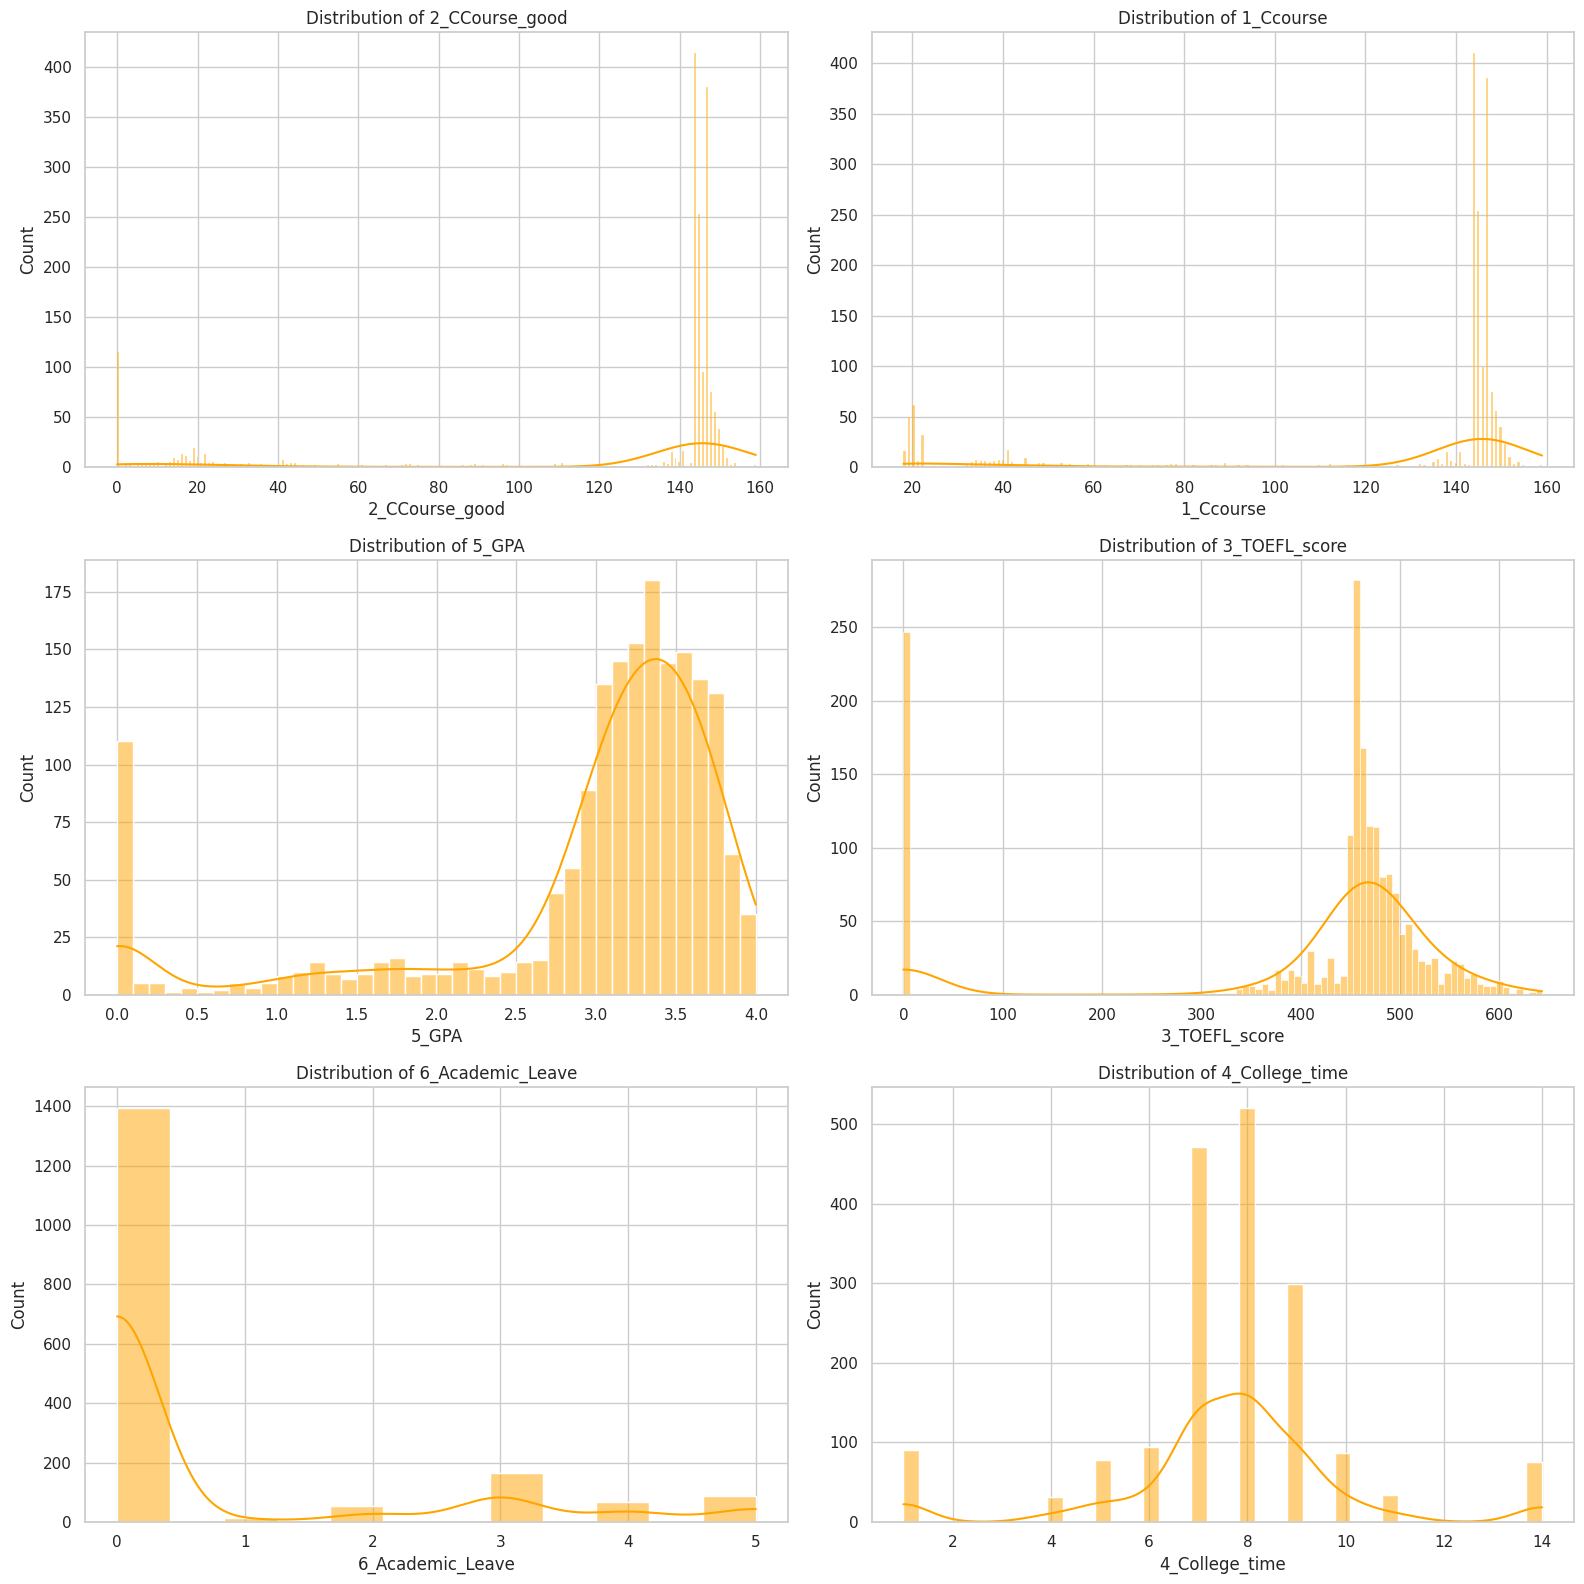

In [10]:
# Set style
sns.set(style='whitegrid')

# Kolom yang akan ditampilkan dalam histogram
columns = ['2_CCourse_good', '1_Ccourse', '5_GPA', '3_TOEFL_score', '6_Academic_Leave', '4_College_time']

# Membuat subplots dengan ukuran 4x2
fig, axes = plt.subplots(3, 2, figsize=(16, 16))

# Menentukan posisi histogram
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    sns.histplot(df[column], kde=True, color='orange', ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {column}')

# Mengatur layout
plt.tight_layout()
plt.show()

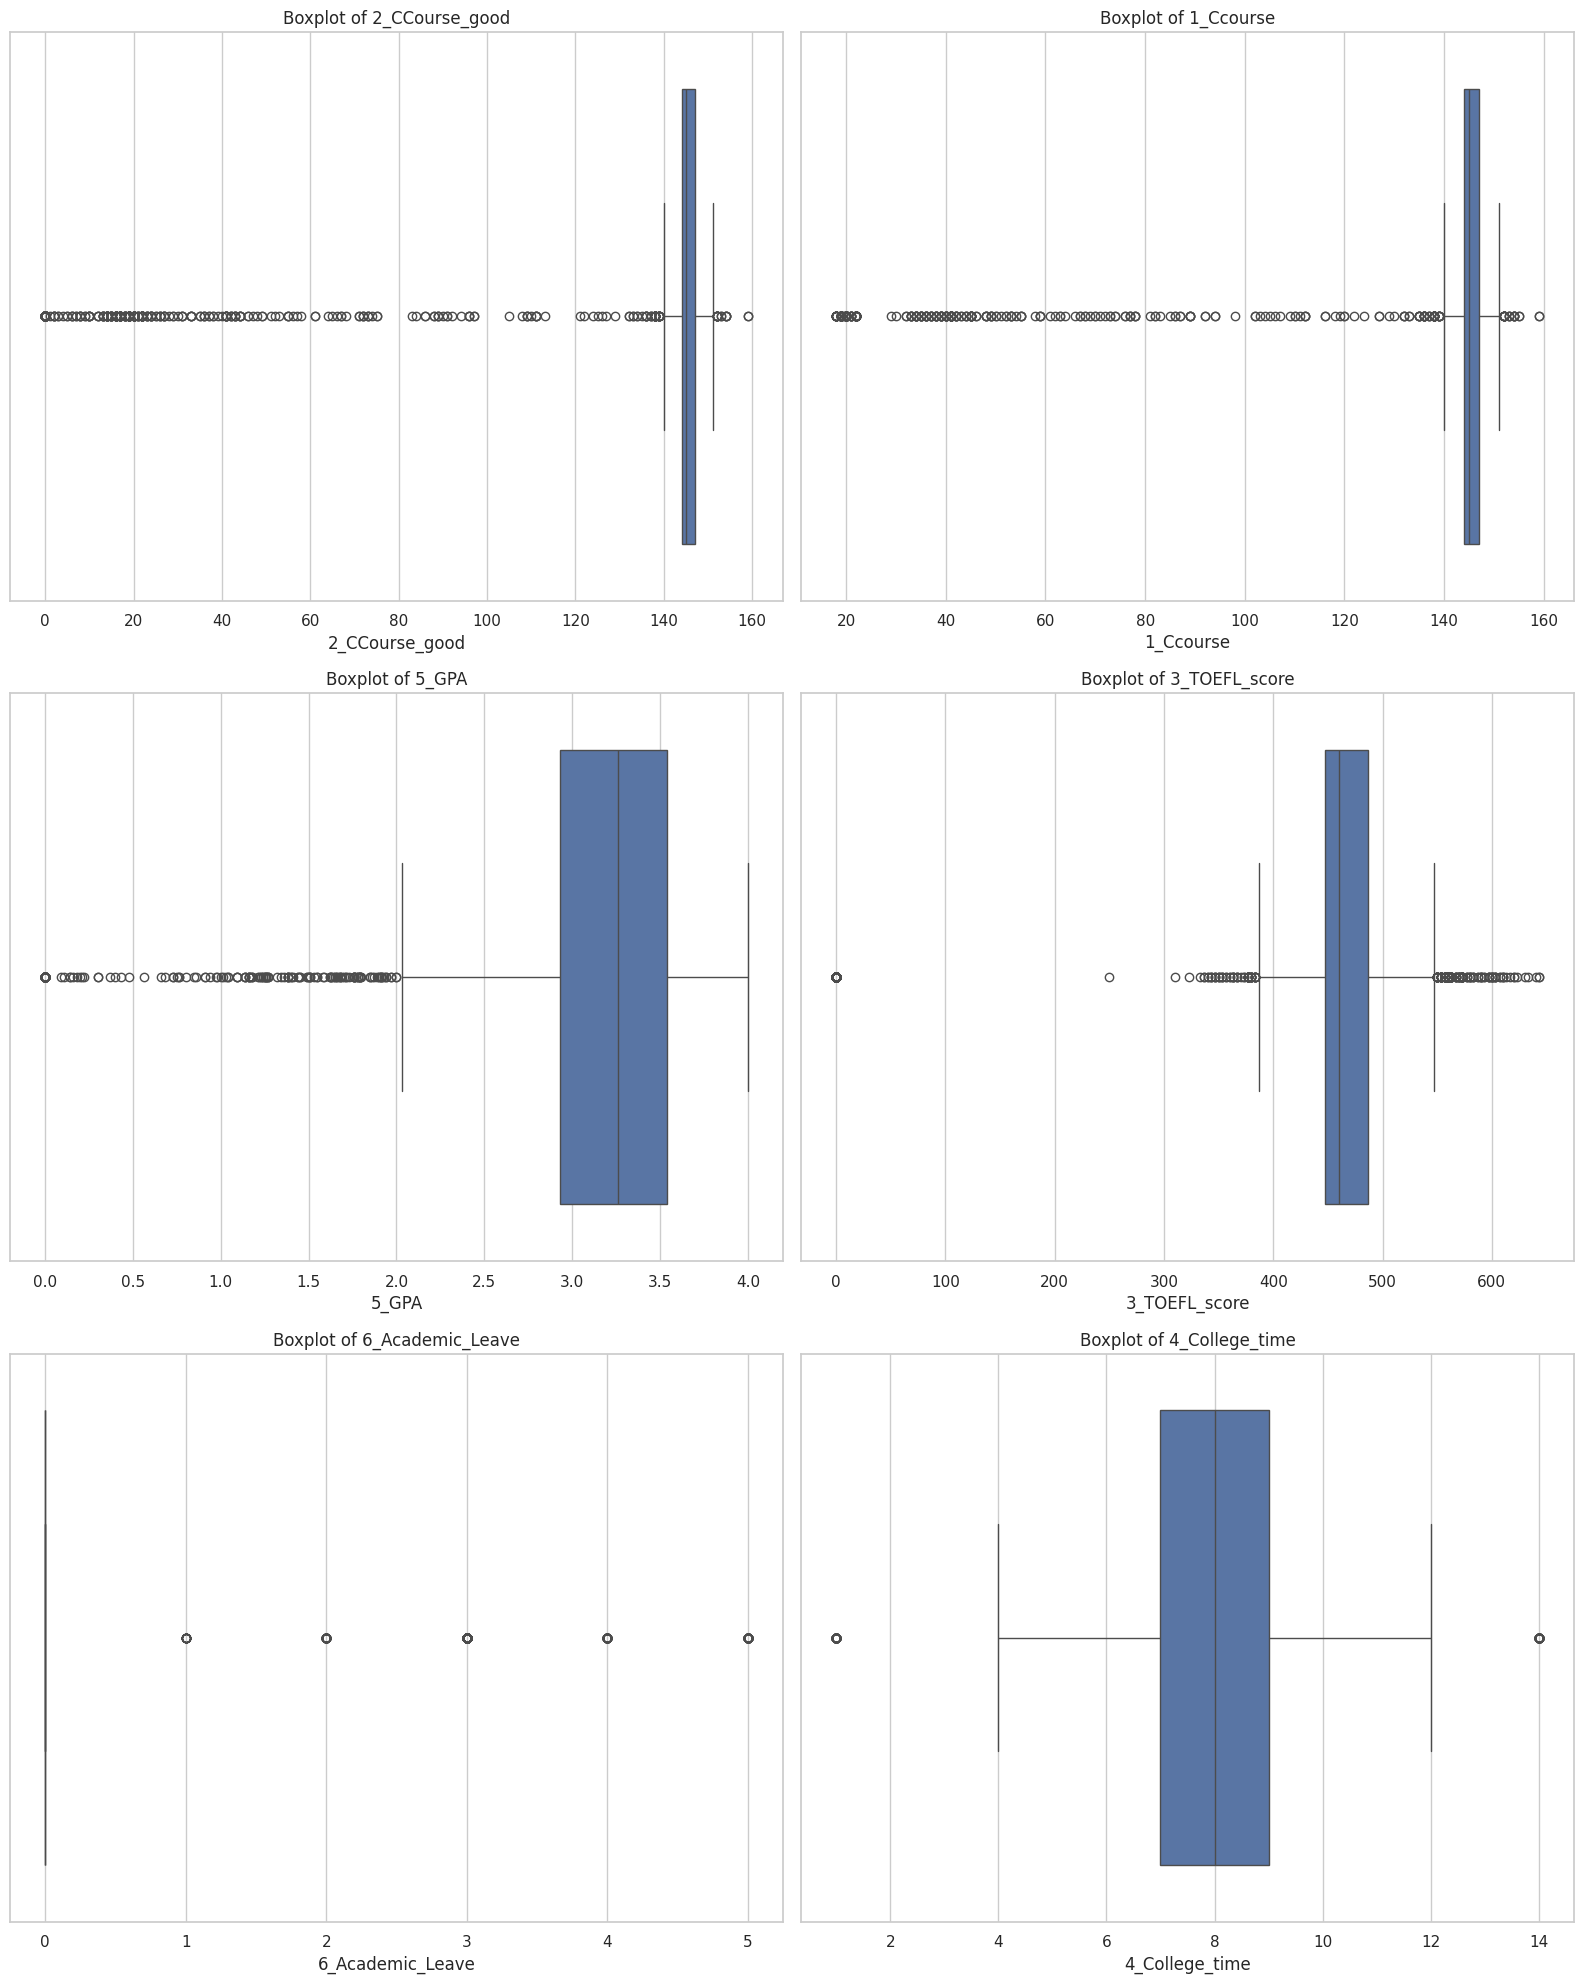

In [11]:
# Kolom yang akan ditampilkan dalam boxplot
columns = ['2_CCourse_good', '1_Ccourse', '5_GPA', '3_TOEFL_score', '6_Academic_Leave', '4_College_time']

# Membuat subplots dengan ukuran 4x2
fig, axes = plt.subplots(3, 2, figsize=(16, 20))

# Menentukan posisi boxplot
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    sns.boxplot(x=df[column], ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {column}')

# Mengatur layout
plt.tight_layout()
plt.show()

**Deteksi Outlier**

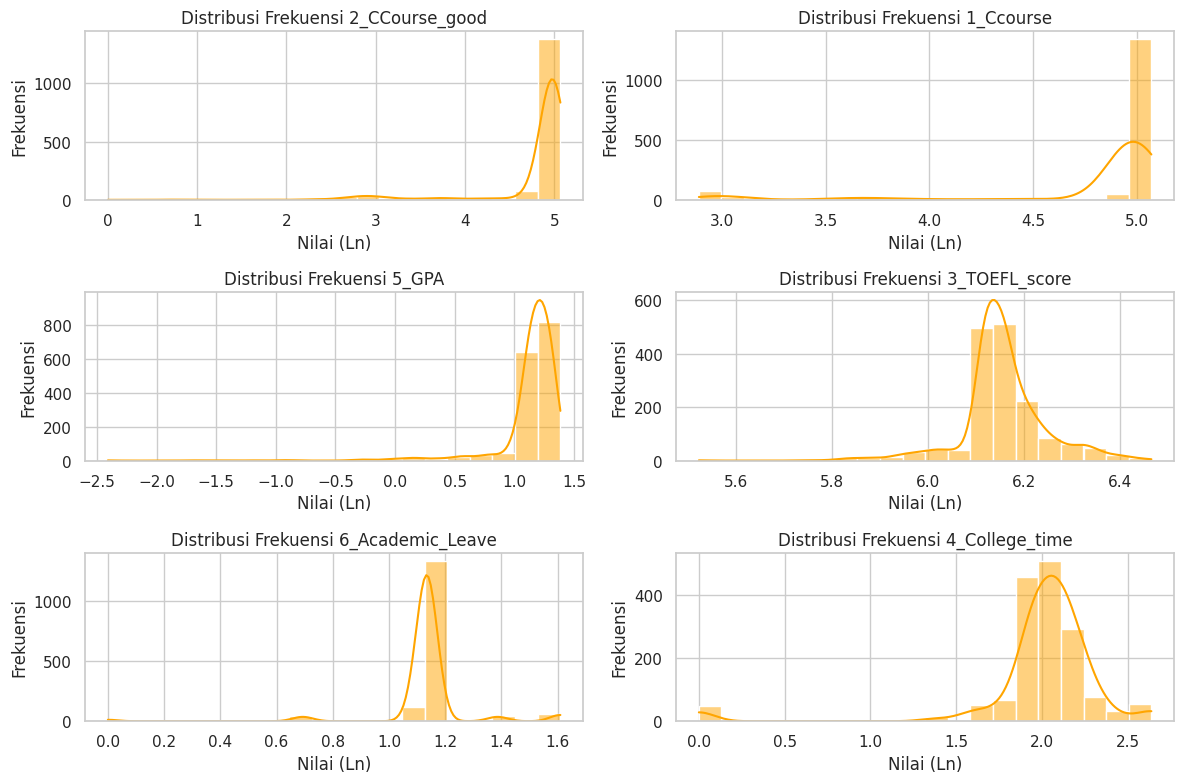

In [12]:
# Deteksi Outlier
columns = ['2_CCourse_good', '1_Ccourse', '5_GPA', '3_TOEFL_score', '6_Academic_Leave', '4_College_time']

# Fungsi untuk menghapus 10% outlier
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    n_outliers = len(outliers)
    to_remove = int(0.1 * n_outliers)  # Hapus 10% outlier
    df = df.drop(outliers.sample(to_remove).index)
    return df

# Menghapus outlier untuk setiap kolom
for col in columns:
    df = remove_outliers(df, col)

# Normalisasi data menggunakan ln
df[columns] = df[columns].apply(lambda x: np.log(x))

# Menangani NaN, inf, dan -inf setelah normalisasi Ln
for col in columns:
    df[col] = df[col].replace([np.inf, -np.inf], np.nan)  # Mengganti inf dan -inf menjadi NaN
    mean_val = df[col].mean()  # Nilai rata-rata kolom
    max_val = df[col].max()  # Nilai maksimum kolom
    min_val = df[col].min()  # Nilai minimum kolom
    df[col] = df[col].fillna(mean_val)  # Mengganti NaN dengan nilai rata-rata kolom
    df[col] = df[col].replace(np.inf, max_val)  # Mengganti inf dengan nilai maksimum kolom
    df[col] = df[col].replace(-np.inf, min_val)  # Mengganti -inf dengan nilai minimum kolom

# Membuat grafik distribusi frekuensi terpisah untuk masing-masing kolom
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True, bins=20, alpha=0.5, color='orange')
    plt.title(f'Distribusi Frekuensi {col}')
    plt.xlabel('Nilai (Ln)')
    plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

In [13]:
# Menampilkan data statistik setelah penghapusan outlier
print("Statistik Deskriptif setelah Penghapusan Outlier:")
df[columns].describe().T

Statistik Deskriptif setelah Penghapusan Outlier:


count      mean       std       min       25%       50%  \
2_CCourse_good    1607.0  4.794781  0.594444  0.000000  4.969813  4.976734   
1_Ccourse         1607.0  4.784306  0.540524  2.890372  4.969813  4.976734   
5_GPA             1607.0  1.140021  0.283848 -2.407946  1.121678  1.196948   
3_TOEFL_score     1607.0  6.157050  0.088631  5.521461  6.115892  6.152733   
6_Academic_Leave  1607.0  1.136011  0.162768  0.000000  1.136011  1.136011   
4_College_time    1607.0  2.001027  0.407444  0.000000  1.945910  2.079442   

                       75%       max  
2_CCourse_good    4.990433  5.068904  
1_Ccourse         4.990433  5.068904  
5_GPA             1.269761  1.386294  
3_TOEFL_score     6.194405  6.466145  
6_Academic_Leave  1.136011  1.609438  
4_College_time    2.197225  2.639057

**Correlation Matrix**

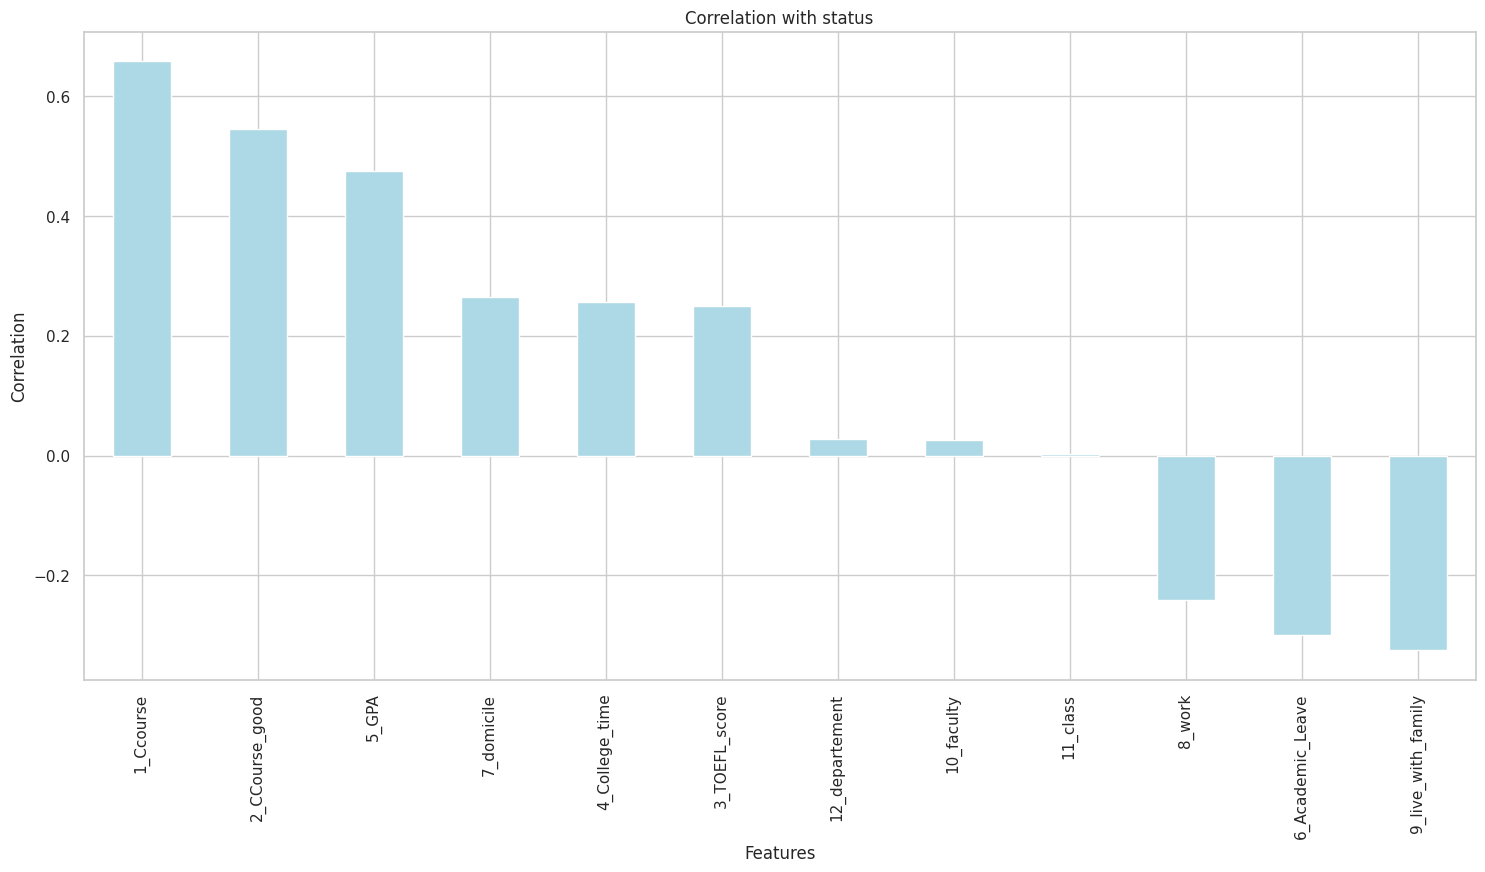

Correlation values with 'status' (sorted):
1_Ccourse             0.658467
2_CCourse_good        0.545607
5_GPA                 0.474950
7_domicile            0.265655
4_College_time        0.255698
3_TOEFL_score         0.250529
12_departement        0.027115
10_faculty            0.026905
11_class              0.003377
8_work               -0.240877
6_Academic_Leave     -0.299548
9_live_with_family   -0.324961
dtype: float64


In [14]:
# Compute correlation matrix
correlation_matrix = df.drop('status', axis=1).corrwith(df.status)

# Sort correlation values in descending order
sorted_correlation = correlation_matrix.sort_values(ascending=False)

# Plot correlation values as a bar chart
sorted_correlation.plot(kind='bar', grid=True, figsize=(16, 8), title="Correlation with status", color="lightblue")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.show()

# Print sorted correlation values
print("Correlation values with 'status' (sorted):")
print(sorted_correlation)

**Uji VIF**

In [15]:
def calc_VIF(x):
    vif= pd.DataFrame()
    vif['variables']=x.columns
    vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

    return(vif)


X = add_constant(df)
ds=pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],index=X.columns)
print(ds)

const                 8.885681e+06
1_Ccourse             4.749707e+00
2_CCourse_good        4.798224e+00
3_TOEFL_score         1.119426e+00
4_College_time        2.249745e+00
5_GPA                 3.292040e+00
6_Academic_Leave      1.206072e+00
7_domicile            1.104148e+00
8_work                1.163565e+00
9_live_with_family    1.204960e+00
10_faculty            3.038372e+02
11_class              1.021591e+00
12_departement        3.037087e+02
status                2.305194e+00
dtype: float64


In [27]:
X = df.iloc[:,:12]
Y = df.iloc[:,12]

# define feature selection
fs = SelectKBest(score_func=f_classif, k='all')
# apply feature selection
X_selected = fs.fit_transform(X, Y)
print(X_selected.shape)

(1607, 12)


In [28]:
Y

0       2
1       1
2       2
3       1
4       2
       ..
1776    2
1777    2
1778    1
1779    2
1782    2
Name: status, Length: 1607, dtype: category
Categories (2, int64): [1, 2]

In [29]:
pd.DataFrame(X_selected).head(3)

0         1         2         3         4         5    6    7    8   \
0  4.990433  4.990433  6.152733  2.197225  1.150572  1.136011  4.0  1.0  1.0   
1  2.944439  2.944439  6.157050  1.791759  0.947789  1.609438  3.0  2.0  2.0   
2  4.990433  4.990433  6.115892  2.079442  1.241269  1.136011  4.0  1.0  1.0   

    9       10    11  
0  4.0  2016.0  42.0  
1  4.0  2016.0  42.0  
2  4.0  2016.0  42.0

**Pemilihan Jumlah Variabel**

In [19]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_regression

# Apply SelectKBest class to extract top 10 best features using mutual_info_regression
BestFeatures = SelectKBest(score_func=mutual_info_regression, k=10)
fit = BestFeatures.fit(X, Y)

# Create a DataFrame for the feature scores and columns
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

# Concatenate the two DataFrames for better visualization
f_Scores = pd.concat([df_columns, df_scores], axis=1)
f_Scores.columns = ['Feature', 'Score']

# Sort the features by their scores in descending order
f_Scores_sorted = f_Scores.sort_values(by='Score', ascending=False)

# Display the top 5 features
print('Top 5 Features')
display(f_Scores_sorted.nlargest(5, 'Score'))

# Display the top 9 features
print('\nTop 9 Features')
display(f_Scores_sorted.nlargest(9, 'Score'))

# Display all features sorted by score
print('\nAll Features')
display(f_Scores_sorted)

Top 5 Features


Feature     Score
1    2_CCourse_good  0.251850
0         1_Ccourse  0.250790
3    4_College_time  0.188236
2     3_TOEFL_score  0.168966
5  6_Academic_Leave  0.149056


Top 9 Features


Feature     Score
1       2_CCourse_good  0.251850
0            1_Ccourse  0.250790
3       4_College_time  0.188236
2        3_TOEFL_score  0.168966
5     6_Academic_Leave  0.149056
4                5_GPA  0.149036
6           7_domicile  0.109883
8   9_live_with_family  0.022749
11      12_departement  0.017438


All Features


Feature     Score
1       2_CCourse_good  0.251850
0            1_Ccourse  0.250790
3       4_College_time  0.188236
2        3_TOEFL_score  0.168966
5     6_Academic_Leave  0.149056
4                5_GPA  0.149036
6           7_domicile  0.109883
8   9_live_with_family  0.022749
11      12_departement  0.017438
9           10_faculty  0.007219
7               8_work  0.007066
10            11_class  0.000000

**Inisiasi Variabel**

In [24]:
X=df.drop("status",axis=1)
Y=df["status"]
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1607 entries, 0 to 1782
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   1_Ccourse           1607 non-null   float64 
 1   2_CCourse_good      1607 non-null   float64 
 2   3_TOEFL_score       1607 non-null   float64 
 3   4_College_time      1607 non-null   float64 
 4   5_GPA               1607 non-null   float64 
 5   6_Academic_Leave    1607 non-null   float64 
 6   7_domicile          1607 non-null   category
 7   8_work              1607 non-null   category
 8   9_live_with_family  1607 non-null   category
 9   10_faculty          1607 non-null   category
 10  11_class            1607 non-null   category
 11  12_departement      1607 non-null   category
dtypes: category(6), float64(6)
memory usage: 98.8 KB


In [25]:
Y.value_counts()

status
2    1407
1     200
Name: count, dtype: int64

**Pemilihan Variabel Y [SKIP]**

In [22]:
#nm = NearMiss(version = 1 , n_neighbors = 10)

#x_sm,y_sm = nm.fit_resample(X,Y)

In [26]:
#y_sm.shape , x_sm.shape

((400,), (400, 12))

In [34]:
#y_sm.value_counts()

In [31]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y, test_size=0.3 , random_state=31)

In [33]:
#X_train , X_test , Y_train , Y_test = train_test_split(x_sm,y_sm, test_size=0.3 , random_state=31)

# **Decision Tree**

Decision Tree Evaluation
Training set score: 1.0000
Test set score: 0.9586
Mean Squared Error : 0.041407867494824016
Root Mean Squared Error : 0.2034892318891199


              precision    recall  f1-score   support

           0       0.83      0.80      0.82        56
           1       0.97      0.98      0.98       427

    accuracy                           0.96       483
   macro avg       0.90      0.89      0.90       483
weighted avg       0.96      0.96      0.96       483



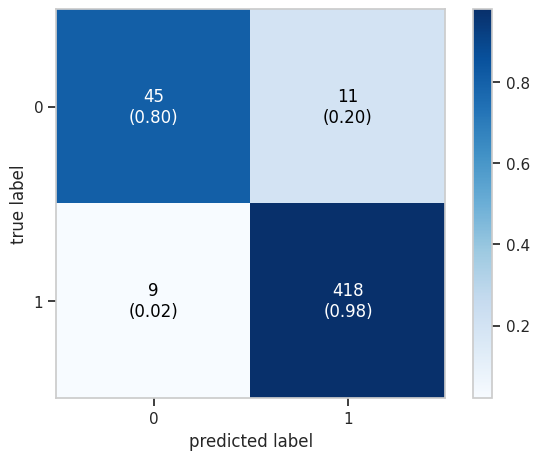

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from mlxtend.plotting import plot_confusion_matrix
import joblib
import math
import matplotlib.pyplot as plt

# Define the Decision Tree model
dt = DecisionTreeClassifier(max_depth=12, random_state=42)

# Fit the model on the training data
dt.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_dt = dt.predict(X_test)

# Evaluate the model
print('Decision Tree Evaluation')
print('Training set score: {:.4f}'.format(dt.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(dt.score(X_test, Y_test)))

# Check MSE & RMSE
mse_dt = mean_squared_error(Y_test, y_pred_dt)
print('Mean Squared Error : ' + str(mse_dt))
rmse_dt = math.sqrt(mse_dt)
print('Root Mean Squared Error : ' + str(rmse_dt))
print('\n')

# Classification report
matrix = classification_report(Y_test, y_pred_dt)
print(matrix)

# Save the model
joblib.dump(dt, 'decision_tree_model.pkl')

# Calculating and plotting the confusion matrix
cm_dt = confusion_matrix(Y_test, y_pred_dt)
plot_confusion_matrix(conf_mat=cm_dt, show_absolute=True,
                      show_normed=True, colorbar=True)
plt.show()


**Decision Tree with Optuna**

In [54]:
import optuna
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from optuna.samplers import TPESampler

# Assuming X_train and X_test are numpy arrays, convert them to pandas DataFrame
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
Y_train = pd.DataFrame(Y_train)
Y_test = pd.DataFrame(Y_test)
SEED = 32

# Define feature selection class
class FeatureSelectionOptuna:
    def __init__(self, model, loss_fn, features, X, y, splits, penalty):
        self.model = model
        self.loss_fn = loss_fn
        self.features = features
        self.X = X
        self.y = y
        self.splits = splits
        self.penalty = penalty

    def __call__(self, trial):
        selected_features = [f for f in self.features if trial.suggest_categorical(f, [True, False])]
        if len(selected_features) == 0:
            return float('inf')

        X_selected = self.X[selected_features]

        kf = StratifiedKFold(n_splits=self.splits)
        scores = []

        for train_index, valid_index in kf.split(X_selected, self.y):
            X_train_fold, X_valid_fold = X_selected.iloc[train_index], X_selected.iloc[valid_index]
            y_train_fold, y_valid_fold = self.y.iloc[train_index], self.y.iloc[valid_index]

            self.model.fit(X_train_fold, y_train_fold)
            y_pred_valid = self.model.predict(X_valid_fold)
            score = self.loss_fn(y_valid_fold, y_pred_valid)
            scores.append(score)

        return np.mean(scores) + self.penalty * len(selected_features)

# Define the Decision Tree model
dt = DecisionTreeClassifier(max_depth=12, random_state=42)

# Define loss function
def loss_fn(y_true, y_pred):
    return 1 - accuracy_score(y_true, y_pred)

# Define other parameters
features = list(X_train.columns)
sampler = TPESampler(seed=SEED)
study = optuna.create_study(direction="minimize", sampler=sampler)

# We first try the model using all features
default_features = {ft: True for ft in features}
study.enqueue_trial(default_features)

study.optimize(FeatureSelectionOptuna(
                         model=dt,
                         loss_fn=loss_fn,
                         features=features,
                         X=X_train,
                         y=Y_train,
                         splits=5,
                         penalty=1e-4,
                         ), n_trials=20)

# Get the best features
best_trial = study.best_trial
selected_features = [f for f in features if best_trial.params[f]]
display(X_train)
selected_features


[I 2025-01-13 03:11:16,494] A new study created in memory with name: no-name-c961bb3b-871f-4d80-bf5c-550e019450ff
[I 2025-01-13 03:11:16,609] Trial 0 finished with value: 0.04925555555555556 and parameters: {0: True, 1: True, 2: True, 3: True, 4: True, 5: True, 6: True, 7: True, 8: True, 9: True, 10: True, 11: True}. Best is trial 0 with value: 0.04925555555555556.
[I 2025-01-13 03:11:16,752] Trial 1 finished with value: 0.08245317460317461 and parameters: {0: True, 1: False, 2: False, 3: False, 4: True, 5: False, 6: True, 7: False, 8: True, 9: False, 10: True, 11: True}. Best is trial 0 with value: 0.04925555555555556.
[I 2025-01-13 03:11:16,849] Trial 2 finished with value: 0.12831111111111115 and parameters: {0: False, 1: False, 2: False, 3: False, 4: False, 5: False, 6: False, 7: True, 8: False, 9: False, 10: True, 11: False}. Best is trial 0 with value: 0.04925555555555556.
[I 2025-01-13 03:11:16,950] Trial 3 finished with value: 0.05596666666666668 and parameters: {0: True, 1: Fa

0         1         2         3         4         5     6    7   \
0     0.963980  0.984519  0.760905  0.787949  0.946892  0.705843  0.75  0.0   
1     0.957691  0.981816  0.638544  0.787949  0.964053  0.705843  0.75  0.0   
2     0.954515  0.980451  0.718810  0.832579  0.924179  0.705843  0.75  0.0   
3     0.954515  0.980451  0.697118  0.737350  0.968545  0.705843  0.75  1.0   
4     0.954515  0.980451  0.645471  0.737350  0.970763  0.705843  0.75  0.0   
...        ...       ...       ...       ...       ...       ...   ...  ...   
1119  0.954515  0.980451  0.638544  0.787949  0.942831  0.705843  1.00  0.0   
1120  0.957691  0.981816  0.718810  0.787949  0.963296  0.705843  0.75  0.0   
1121  0.354913  0.570216  0.672806  0.000000  0.739732  0.705843  0.75  1.0   
1122  0.938293  0.973479  0.629238  1.000000  0.942831  0.705843  0.50  0.0   
1123  0.957691  0.981816  0.629238  0.787949  0.953262  0.705843  0.75  0.0   

       8    9    10        11  
0     0.0  0.6  0.5  0.584906  
1     0.0  1.0  1.0  0.981132  
2     0.0  0.4  0.5  0.396226  
3     0.0  0.6  0.0  0.584906  
4     0.0  1.0  0.5  1.000000  
...   ...  ...  ...       ...  
1119  1.0  0.8  0.5  0.773585  
1120  0.0  0.6  0.0  0.566038  
1121  0.0  0.8  1.0  0.792453  
1122  1.0  0.6  1.0  0.584906  
1123  0.0  0.6  1.0  0.566038  

[1124 rows x 12 columns]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

Decision Tree Evaluation
Training set score: 1.0000
Test set score: 0.9586
Mean Squared Error : 0.041407867494824016
Root Mean Squared Error : 0.2034892318891199


              precision    recall  f1-score   support

           0       0.83      0.80      0.82        56
           1       0.97      0.98      0.98       427

    accuracy                           0.96       483
   macro avg       0.90      0.89      0.90       483
weighted avg       0.96      0.96      0.96       483



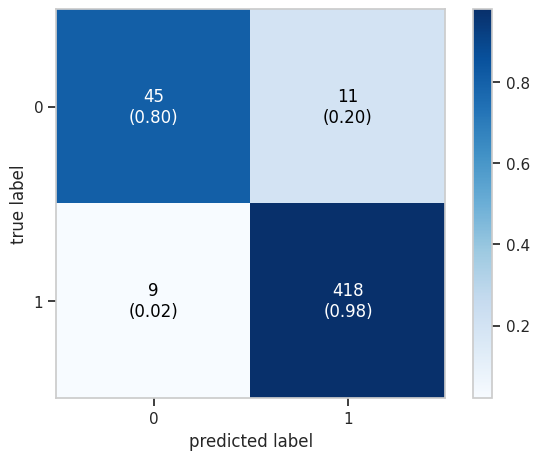

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
import joblib
import math
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

# Define the Decision Tree model
dt = DecisionTreeClassifier(max_depth=12, random_state=42)

# Train final model with best features
X_train_dt_optuna = X_train[selected_features].copy()
X_test_dt_optuna = X_test[selected_features].copy()

# Fit the model on the training data
dt.fit(X_train_dt_optuna, Y_train)

# Make predictions on the test set
y_pred_dt = dt.predict(X_test_dt_optuna)

# Evaluate the model
print('Decision Tree Evaluation')
print('Training set score: {:.4f}'.format(dt.score(X_train_dt_optuna, Y_train)))
print('Test set score: {:.4f}'.format(dt.score(X_test_dt_optuna, Y_test)))

# Check MSE & RMSE
mse_dt = mean_squared_error(Y_test, y_pred_dt)
print('Mean Squared Error : ' + str(mse_dt))
rmse_dt = math.sqrt(mse_dt)
print('Root Mean Squared Error : ' + str(rmse_dt))
print('\n')

# Classification report
matrix = classification_report(Y_test, y_pred_dt)
print(matrix)

# Save the model
joblib.dump(dt, 'decision_tree_optuna_model.pkl')

# Calculating and plotting the confusion matrix
cm_dt = confusion_matrix(Y_test, y_pred_dt)
plot_confusion_matrix(conf_mat=cm_dt, show_absolute=True, show_normed=True, colorbar=True)
plt.show()

**Decision Tree with Selected Sequential Factor**

[1, 2, 3, 4, 5, 6, 7, 8, 9, 11]

Decision Tree Evaluation
Training set score: 0.9991
Test set score: 0.9545
Mean Squared Error : 0.045548654244306416
Root Mean Squared Error : 0.21342130691265673


              precision    recall  f1-score   support

           0       0.78      0.84      0.81        56
           1       0.98      0.97      0.97       427

    accuracy                           0.95       483
   macro avg       0.88      0.90      0.89       483
weighted avg       0.96      0.95      0.96       483



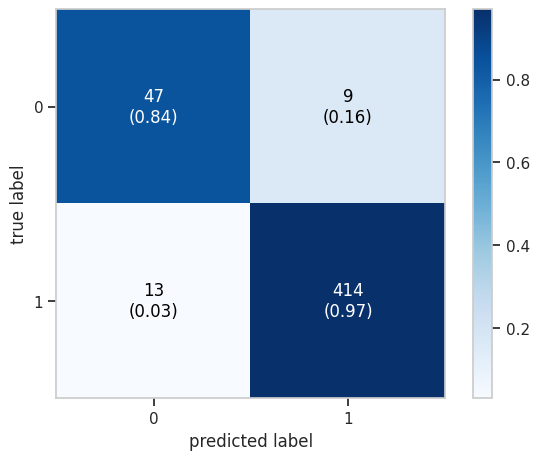

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
import joblib
import math
import matplotlib.pyplot as plt
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_confusion_matrix

# Stratified kfold over the train set for cross validation
SEED = 32
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
splits = list(skf.split(X_train, Y_train))

# Define the Decision Tree model
dt = DecisionTreeClassifier(max_depth=12, random_state=42)

# Feature selection using Sequential Feature Selector
sfs = SequentialFeatureSelector(dt, k_features=10, forward=True, floating=False, cv=splits)
sfs.fit(X_train, Y_train)

# Get the selected features
selected_features = list(X_train.columns[list(sfs.k_feature_idx_)])
display(selected_features)

# Train final model with the best selected features
X_train_dt_sfs = X_train[selected_features].copy()
X_test_dt_sfs = X_test[selected_features].copy()

# Fit the model on the training data
dt.fit(X_train_dt_sfs, Y_train)

# Predict on the test data
y_pred_dt = dt.predict(X_test_dt_sfs)

# Evaluation
print('Decision Tree Evaluation')
print('Training set score: {:.4f}'.format(dt.score(X_train_dt_sfs, Y_train)))
print('Test set score: {:.4f}'.format(dt.score(X_test_dt_sfs, Y_test)))

# Check MSE & RMSE
mse_dt = mean_squared_error(Y_test, y_pred_dt)
print('Mean Squared Error : ' + str(mse_dt))
rmse_dt = math.sqrt(mse_dt)
print('Root Mean Squared Error : ' + str(rmse_dt))
print('\n')

# Classification report
matrix = classification_report(Y_test, y_pred_dt)
print(matrix)

# Save the model
joblib.dump(dt, 'decision_tree_sfs_model.pkl')

# Calculating and plotting the confusion matrix
cm_dt = confusion_matrix(Y_test, y_pred_dt)
plot_confusion_matrix(conf_mat=cm_dt, show_absolute=True, show_normed=True, colorbar=True)
plt.show()

**Decision Tree with Chi-squared**

Decision Tree Evaluation
Training set score: 0.9991
Test set score: 0.9565
Mean Squared Error : 0.043478260869565216
Root Mean Squared Error : 0.20851441405707477


              precision    recall  f1-score   support

           0       0.80      0.84      0.82        56
           1       0.98      0.97      0.98       427

    accuracy                           0.96       483
   macro avg       0.89      0.91      0.90       483
weighted avg       0.96      0.96      0.96       483



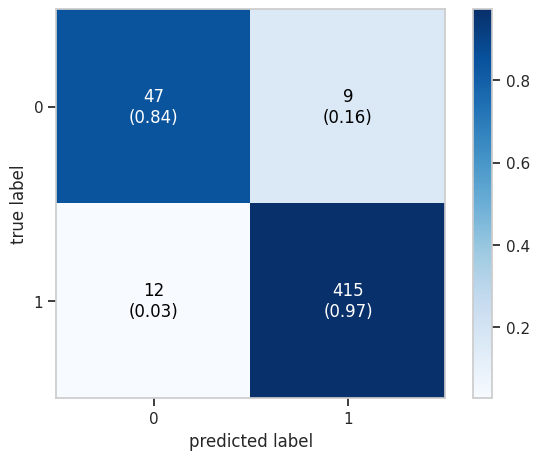

In [61]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import joblib
import math

# Normalize the data to make it non-negative
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Select the best K features using chi-square
k = 10  # Set number of top features to select
chi2_selector = SelectKBest(score_func=chi2, k=k)
X_train_selected = chi2_selector.fit_transform(X_train_scaled, Y_train)
X_test_selected = chi2_selector.transform(X_test_scaled)

# Initialize and train the Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=12, random_state=42)
dt.fit(X_train_selected, Y_train)

# Make predictions on test set
y_pred_dt = dt.predict(X_test_selected)

# Evaluation
print('Decision Tree Evaluation')
print('Training set score: {:.4f}'.format(dt.score(X_train_selected, Y_train)))
print('Test set score: {:.4f}'.format(dt.score(X_test_selected, Y_test)))

# Check MSE & RMSE
mse_dt = mean_squared_error(Y_test, y_pred_dt)
print('Mean Squared Error : ' + str(mse_dt))
rmse_dt = math.sqrt(mse_dt)
print('Root Mean Squared Error : ' + str(rmse_dt))
print('\n')

# Classification report
matrix = classification_report(Y_test, y_pred_dt)
print(matrix)

# Save the model
joblib.dump(dt, 'decision_tree_chi_model.pkl')

# Calculating and plotting the confusion matrix
cm_dt = confusion_matrix(Y_test, y_pred_dt)
plot_confusion_matrix(conf_mat=cm_dt, show_absolute=True,
                      show_normed=True,
                      colorbar=True)
plt.show()

# **Random Forest**

Random Forest Evaluation
Training set score: 0.9964
Test set score: 0.9607
Mean Squared Error : 0.039337474120082816
Root Mean Squared Error : 0.19833676946063938


              precision    recall  f1-score   support

           1       0.80      0.88      0.84        56
           2       0.98      0.97      0.98       427

    accuracy                           0.96       483
   macro avg       0.89      0.92      0.91       483
weighted avg       0.96      0.96      0.96       483



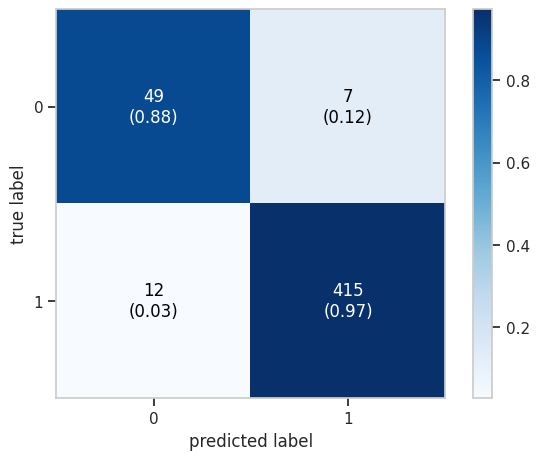

In [32]:
rf = RandomForestClassifier(max_depth=12 ,n_estimators =10, random_state=42 )

# fitting the model on the train data
rf.fit(X_train, Y_train)

# make predictions on test set
y_pred_rf = rf.predict(X_test)

print('Random Forest Evaluation')
print('Training set score: {:.4f}'.format(rf.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(rf.score(X_test, Y_test)))

#check MSE & RMSE
mse_rf =mean_squared_error(Y_test, y_pred_rf)
print('Mean Squared Error : '+ str(mse_rf))
rmse_rf = math.sqrt(mean_squared_error(Y_test, y_pred_rf))
print('Root Mean Squared Error : '+ str(rmse_rf))
print('\n')

matrix = classification_report(Y_test,y_pred_rf )
print(matrix)

# Save the model
joblib.dump(rf, 'random_forest_model.pkl')


# calculating and plotting the confusion matrix
cm_rf = confusion_matrix(Y_test,y_pred_rf)
plot_confusion_matrix(conf_mat=cm_rf,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Random Forest with Optuna**

In [35]:
# Assuming X_train and X_test are numpy arrays, convert them to pandas DataFrame
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
Y_train = pd.DataFrame(Y_train)
Y_test = pd.DataFrame(Y_test)
SEED = 32

# Define feature selection class
class FeatureSelectionOptuna:
    def __init__(self, model, loss_fn, features, X, y, splits, penalty):
        self.model = model
        self.loss_fn = loss_fn
        self.features = features
        self.X = X
        self.y = y
        self.splits = splits
        self.penalty = penalty

    def __call__(self, trial):
        selected_features = [f for f in self.features if trial.suggest_categorical(f, [True, False])]
        if len(selected_features) == 0:
            return float('inf')

        X_selected = self.X[selected_features]

        kf = StratifiedKFold(n_splits=self.splits)
        scores = []

        for train_index, valid_index in kf.split(X_selected, self.y):
            X_train_fold, X_valid_fold = X_selected.iloc[train_index], X_selected.iloc[valid_index]
            y_train_fold, y_valid_fold = self.y.iloc[train_index], self.y.iloc[valid_index]

            self.model.fit(X_train_fold, y_train_fold)
            y_pred_valid = self.model.predict(X_valid_fold)
            score = self.loss_fn(y_valid_fold, y_pred_valid)
            scores.append(score)

        return np.mean(scores) + self.penalty * len(selected_features)

# Define the model
rf = RandomForestClassifier(max_depth=12 ,n_estimators =10, random_state=42 )

# Define loss function
def loss_fn(y_true, y_pred):
    return 1 - accuracy_score(y_true, y_pred)

# Define other parameters
features = list(X_train.columns)
sampler = TPESampler(seed=SEED)
study = optuna.create_study(direction="minimize", sampler=sampler)

# We first try the model using all features
default_features = {ft: True for ft in features}
study.enqueue_trial(default_features)

study.optimize(FeatureSelectionOptuna(
                         model=rf,
                         loss_fn=loss_fn,
                         features=features,
                         X=X_train,
                         y=Y_train,
                         splits=5,
                         penalty=1e-4,
                         ), n_trials=20)

# Get the best features
best_trial = study.best_trial
selected_features = [f for f in features if best_trial.params[f]]
display(X_train)
selected_features

[I 2025-01-13 01:25:42,139] A new study created in memory with name: no-name-ccb97981-70d7-4498-9948-61b4a5d66536
[I 2025-01-13 01:25:42,311] Trial 0 finished with value: 0.050140476190476166 and parameters: {'1_Ccourse': True, '2_CCourse_good': True, '3_TOEFL_score': True, '4_College_time': True, '5_GPA': True, '6_Academic_Leave': True, '7_domicile': True, '8_work': True, '9_live_with_family': True, '10_faculty': True, '11_class': True, '12_departement': True}. Best is trial 0 with value: 0.050140476190476166.
[I 2025-01-13 01:25:42,487] Trial 1 finished with value: 0.06288571428571428 and parameters: {'1_Ccourse': True, '2_CCourse_good': False, '3_TOEFL_score': False, '4_College_time': False, '5_GPA': True, '6_Academic_Leave': False, '7_domicile': True, '8_work': False, '9_live_with_family': True, '10_faculty': False, '11_class': True, '12_departement': True}. Best is trial 0 with value: 0.050140476190476166.
[I 2025-01-13 01:25:42,638] Trial 2 finished with value: 0.1283111111111111

1_Ccourse  2_CCourse_good  3_TOEFL_score  4_College_time     5_GPA  \
327    4.990433        4.990433       6.240276        2.079442  1.184790   
1620   4.976734        4.976734       6.124683        2.079442  1.249902   
1311   4.969813        4.969813       6.200509        2.197225  1.098612   
586    4.969813        4.969813       6.180017        1.945910  1.266948   
1771   4.969813        4.969813       6.131226        1.945910  1.275363   
...         ...             ...            ...             ...       ...   
902    4.969813        4.969813       6.124683        2.079442  1.169381   
665    4.976734        4.976734       6.200509        2.079442  1.247032   
974    3.663562        2.890372       6.157050        0.000000  0.398776   
16     4.934474        4.934474       6.115892        2.639057  1.169381   
787    4.976734        4.976734       6.115892        2.079442  1.208960   

      6_Academic_Leave 7_domicile 8_work 9_live_with_family 10_faculty  \
327           1.136011          4      1                  1          4   
1620          1.136011          4      1                  1          6   
1311          1.136011          4      1                  1          3   
586           1.136011          4      2                  1          4   
1771          1.136011          4      1                  1          6   
...                ...        ...    ...                ...        ...   
902           1.136011          5      1                  2          5   
665           1.136011          4      1                  1          4   
974           1.136011          4      2                  1          5   
16            1.136011          3      1                  2          4   
787           1.136011          4      1                  1          4   

     11_class 12_departement  
327      2015             42  
1620     2016             63  
1311     2015             32  
586      2014             42  
1771     2015             64  
...       ...            ...  
902      2015             52  
665      2014             41  
974      2016             53  
16       2016             42  
787      2016             41  

[1124 rows x 12 columns]

['2_CCourse_good',
 '3_TOEFL_score',
 '4_College_time',
 '6_Academic_Leave',
 '7_domicile',
 '9_live_with_family',
 '10_faculty',
 '12_departement']

Random Forest Evaluation
Training set score: 0.9973
Test set score: 0.9648
Mean Squared Error : 0.035196687370600416
Root Mean Squared Error : 0.18760780199821225


              precision    recall  f1-score   support

           1       0.79      0.95      0.86        56
           2       0.99      0.97      0.98       427

    accuracy                           0.96       483
   macro avg       0.89      0.96      0.92       483
weighted avg       0.97      0.96      0.97       483



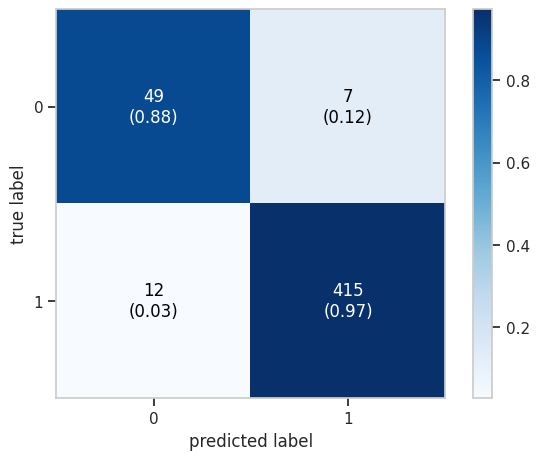

In [36]:
# Train final model with best features
X_train_rf_optuna = X_train[selected_features].copy()
X_test_rf_optuna = X_test[selected_features].copy()

rf.fit(X_train_rf_optuna, Y_train)
y_pred_rf = rf.predict(X_test_rf_optuna)

print('Random Forest Evaluation')
print('Training set score: {:.4f}'.format(rf.score(X_train_rf_optuna, Y_train)))
print('Test set score: {:.4f}'.format(rf.score(X_test_rf_optuna, Y_test)))

# Check MSE & RMSE
mse_rf = mean_squared_error(Y_test, y_pred_rf)
print('Mean Squared Error : ' + str(mse_rf))
rmse_rf = math.sqrt(mse_rf)
print('Root Mean Squared Error : ' + str(rmse_rf))
print('\n')

# Classification report
matrix = classification_report(Y_test, y_pred_rf)
print(matrix)

# Save the model
joblib.dump(rf, 'random_forest_optuna_model.pkl')

# Calculating and plotting the confusion matrix
cm_ft = confusion_matrix(Y_test, y_pred_rf)
plot_confusion_matrix(conf_mat=cm_rf, show_absolute=True, show_normed=True, colorbar=True)
plt.show()

**Random Forest with Selected Sequential Factor**

['2_CCourse_good',
 '3_TOEFL_score',
 '4_College_time',
 '5_GPA',
 '6_Academic_Leave',
 '9_live_with_family',
 '10_faculty',
 '11_class',
 '12_departement']

Random Forest Evaluation
Training set score: 0.9982
Test set score: 0.9565
Mean Squared Error : 0.043478260869565216
Root Mean Squared Error : 0.20851441405707477


              precision    recall  f1-score   support

           1       0.81      0.82      0.81        56
           2       0.98      0.97      0.98       427

    accuracy                           0.96       483
   macro avg       0.89      0.90      0.89       483
weighted avg       0.96      0.96      0.96       483



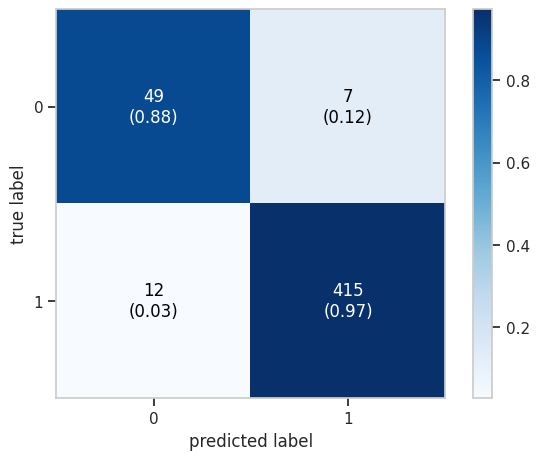

In [37]:
# Stratified kfold over the train set for cross validation
SEED = 32
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
splits = list(skf.split(X_train, Y_train))

# define the model
rf = RandomForestClassifier(max_depth=12 ,n_estimators =10, random_state=42 )
sfs = SequentialFeatureSelector(rf, n_features_to_select=9, cv=splits)
sfs.fit(X_train, Y_train);

selected_features = list(X_train.columns[sfs.get_support()])
display(selected_features)

# Train final model with best features
X_train_rf_sfs = X_train[selected_features].copy()
X_test_rf_sfs = X_test[selected_features].copy()

rf.fit(X_train_rf_sfs, Y_train)
y_pred_rf = rf.predict(X_test_rf_sfs)

print('Random Forest Evaluation')
print('Training set score: {:.4f}'.format(rf.score(X_train_rf_sfs, Y_train)))
print('Test set score: {:.4f}'.format(rf.score(X_test_rf_sfs, Y_test)))

# Check MSE & RMSE
mse_rf = mean_squared_error(Y_test, y_pred_rf)
print('Mean Squared Error : ' + str(mse_rf))
rmse_rf = math.sqrt(mse_rf)
print('Root Mean Squared Error : ' + str(rmse_rf))
print('\n')

# Classification report
matrix = classification_report(Y_test, y_pred_rf)
print(matrix)

# Save the model
joblib.dump(rf, 'random_forest_sfs_model.pkl')

# Calculating and plotting the confusion matrix
cm_ft = confusion_matrix(Y_test, y_pred_rf)
plot_confusion_matrix(conf_mat=cm_rf, show_absolute=True, show_normed=True, colorbar=True)
plt.show()

**Random Forest with Chi-squared Feature Selection**

Random Forest Evaluation
Training set score: 0.9956
Test set score: 0.9565
Mean Squared Error : 0.043478260869565216
Root Mean Squared Error : 0.20851441405707477


              precision    recall  f1-score   support

           0       0.79      0.86      0.82        56
           1       0.98      0.97      0.98       427

    accuracy                           0.96       483
   macro avg       0.88      0.91      0.90       483
weighted avg       0.96      0.96      0.96       483



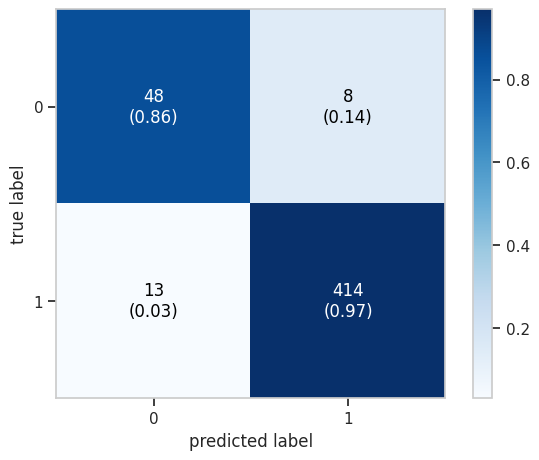

In [64]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import joblib
import math

# Normalize the data to make it non-negative
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Select the best K features using chi-square
k = 10  # Set number of top features to select
chi2_selector = SelectKBest(score_func=chi2, k=k)
X_train_selected = chi2_selector.fit_transform(X_train_scaled, Y_train)
X_test_selected = chi2_selector.transform(X_test_scaled)

# Initialize and train the Random Forest Classifier
rf = RandomForestClassifier(max_depth=12, n_estimators=10, random_state=42)
rf.fit(X_train_selected, Y_train)

# Make predictions on test set
y_pred_rf = rf.predict(X_test_selected)

# Evaluation
print('Random Forest Evaluation')
print('Training set score: {:.4f}'.format(rf.score(X_train_selected, Y_train)))
print('Test set score: {:.4f}'.format(rf.score(X_test_selected, Y_test)))

# Check MSE & RMSE
mse_rf = mean_squared_error(Y_test, y_pred_rf)
print('Mean Squared Error : ' + str(mse_rf))
rmse_rf = math.sqrt(mean_squared_error(Y_test, y_pred_rf))
print('Root Mean Squared Error : ' + str(rmse_rf))
print('\n')

# Classification report
matrix = classification_report(Y_test, y_pred_rf)
print(matrix)

# Save the model
joblib.dump(rf, 'random_forest_chi_model.pkl')

# Calculating and plotting the confusion matrix
cm_rf = confusion_matrix(Y_test, y_pred_rf)
plot_confusion_matrix(conf_mat=cm_rf, show_absolute=True,
                      show_normed=True,
                      colorbar=True)
plt.show()

# **Naive Bayes**

Naive Bayes Evaluation
Training set score: 0.9288
Test set score: 0.9234
Mean Squared Error : 0.07660455486542443
Root Mean Squared Error : 0.27677527863850926


              precision    recall  f1-score   support

           1       0.61      0.83      0.70        52
           2       0.98      0.94      0.96       431

    accuracy                           0.92       483
   macro avg       0.79      0.88      0.83       483
weighted avg       0.94      0.92      0.93       483



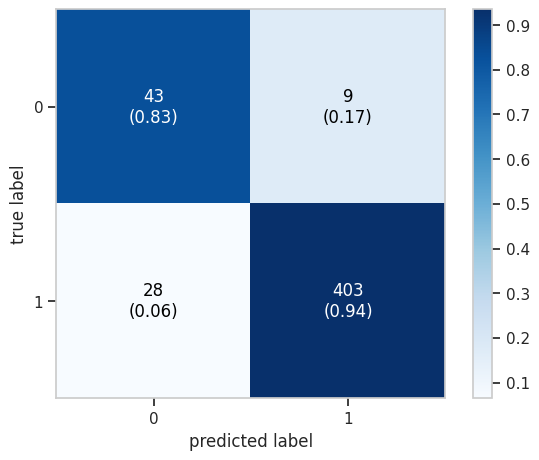

In [ ]:
from sklearn.naive_bayes import GaussianNB

# define the model
gnb = GaussianNB()

# train the model
gnb.fit(X_train, Y_train)

y_pred_gnb = gnb.predict(X_test)

print('Naive Bayes Evaluation')
print('Training set score: {:.4f}'.format(gnb.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, Y_test)))

# check MSE & RMSE
mse_gnb = mean_squared_error(Y_test, y_pred_gnb)
print('Mean Squared Error : ' + str(mse_gnb))
rmse_gnb = math.sqrt(mean_squared_error(Y_test, y_pred_gnb))
print('Root Mean Squared Error : ' + str(rmse_gnb))
print('\n')

matrix = classification_report(Y_test, y_pred_gnb)
print(matrix)

# Save the model
joblib.dump(gnb, 'naive_bayes_model.pkl')

# calculating and plotting the confusion matrix
cm_gnb = confusion_matrix(Y_test, y_pred_gnb)
plot_confusion_matrix(conf_mat=cm_gnb, show_absolute=True,
                      show_normed=True,
                      colorbar=True)
plt.show()

**Naive Bayes with Optuna**

In [ ]:
# Assuming X_train and X_test are numpy arrays, convert them to pandas DataFrame
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
Y_train = pd.DataFrame(Y_train)
Y_test = pd.DataFrame(Y_test)
SEED = 32

# Define feature selection class
class FeatureSelectionOptuna:
    def __init__(self, model, loss_fn, features, X, y, splits, penalty):
        self.model = model
        self.loss_fn = loss_fn
        self.features = features
        self.X = X
        self.y = y
        self.splits = splits
        self.penalty = penalty

    def __call__(self, trial):
        selected_features = [f for f in self.features if trial.suggest_categorical(f, [True, False])]
        if len(selected_features) == 0:
            return float('inf')

        X_selected = self.X[selected_features]

        kf = StratifiedKFold(n_splits=self.splits)
        scores = []

        for train_index, valid_index in kf.split(X_selected, self.y):
            X_train_fold, X_valid_fold = X_selected.iloc[train_index], X_selected.iloc[valid_index]
            y_train_fold, y_valid_fold = self.y.iloc[train_index], self.y.iloc[valid_index]

            self.model.fit(X_train_fold, y_train_fold)
            y_pred_valid = self.model.predict(X_valid_fold)
            score = self.loss_fn(y_valid_fold, y_pred_valid)
            scores.append(score)

        return np.mean(scores) + self.penalty * len(selected_features)

# Define the model
gnb = GaussianNB()

# Define loss function
def loss_fn(y_true, y_pred):
    return 1 - accuracy_score(y_true, y_pred)

# Define other parameters
features = list(X_train.columns)
sampler = TPESampler(seed=SEED)
study = optuna.create_study(direction="minimize", sampler=sampler)

# We first try the model using all features
default_features = {ft: True for ft in features}
study.enqueue_trial(default_features)

study.optimize(FeatureSelectionOptuna(
                         model=gnb,
                         loss_fn=loss_fn,
                         features=features,
                         X=X_train,
                         y=Y_train,
                         splits=5,
                         penalty=1e-4,
                         ), n_trials=20)

# Get the best features
best_trial = study.best_trial
selected_features = [f for f in features if best_trial.params[f]]
display(X_train)
selected_features

[I 2024-09-18 14:37:03,777] A new study created in memory with name: no-name-d85649d9-b771-4953-ba82-63105329a947
[I 2024-09-18 14:37:03,919] Trial 0 finished with value: 0.07416428571428574 and parameters: {'1_Ccourse': True, '2_CCourse_good': True, '3_TOEFL_score': True, '4_College_time': True, '5_GPA': True, '6_Academic_Leave': True, '7_domicile': True, '8_work': True, '9_live_with_family': True, '10_faculty': True, '11_class': True, '12_departement': True}. Best is trial 0 with value: 0.07416428571428574.
[I 2024-09-18 14:37:03,998] Trial 1 finished with value: 0.07802063492063492 and parameters: {'1_Ccourse': True, '2_CCourse_good': False, '3_TOEFL_score': False, '4_College_time': False, '5_GPA': True, '6_Academic_Leave': False, '7_domicile': True, '8_work': False, '9_live_with_family': True, '10_faculty': False, '11_class': True, '12_departement': True}. Best is trial 0 with value: 0.07416428571428574.
[I 2024-09-18 14:37:04,109] Trial 2 finished with value: 0.20305714285714285 a

1_Ccourse  2_CCourse_good  3_TOEFL_score  4_College_time     5_GPA  \
332    4.990433        4.990433       6.278521        2.079442  1.160021   
1624   3.555348        2.079442       6.158925        1.791759 -0.415515   
1307   4.969813        4.969813       6.309918        1.945910  1.311032   
583    4.753590        4.262680       6.158925        2.197225  0.530628   
1772   4.969813        4.969813       6.131226        2.197225  1.101940   
...         ...             ...            ...             ...       ...   
899    4.905275        4.905275       6.158925        2.639057  1.202972   
654    5.017280        5.017280       6.194405        1.945910  1.266948   
969    5.010635        5.010635       6.259581        1.945910  1.337629   
16     4.934474        4.934474       6.115892        2.639057  1.169381   
781    4.969813        4.969813       6.109248        2.079442  1.196948   

      6_Academic_Leave 7_domicile 8_work 9_live_with_family 10_faculty  \
332           1.136801          4      1                  2          4   
1624          1.609438          3      2                  1          6   
1307          1.136801          4      1                  1          3   
583           1.098612          3      2                  1          4   
1772          1.136801          4      2                  1          6   
...                ...        ...    ...                ...        ...   
899           1.609438          3      1                  2          5   
654           1.136801          4      1                  1          4   
969           1.136801          3      1                  2          5   
16            1.136801          3      1                  2          4   
781           1.136801          3      1                  1          4   

     11_class 12_departement  
332      2015             42  
1624     2016             63  
1307     2015             32  
583      2014             42  
1772     2015             64  
...       ...            ...  
899      2015             52  
654      2014             41  
969      2016             53  
16       2016             42  
781      2016             41  

[1124 rows x 12 columns]

['1_Ccourse',
 '2_CCourse_good',
 '3_TOEFL_score',
 '5_GPA',
 '6_Academic_Leave',
 '7_domicile',
 '10_faculty',
 '12_departement']

Naive Bayes Evaluation
Training set score: 0.9262
Test set score: 0.9193
Mean Squared Error : 0.08074534161490683
Root Mean Squared Error : 0.28415724804218323


              precision    recall  f1-score   support

           1       0.59      0.81      0.68        52
           2       0.98      0.93      0.95       431

    accuracy                           0.92       483
   macro avg       0.78      0.87      0.82       483
weighted avg       0.93      0.92      0.92       483



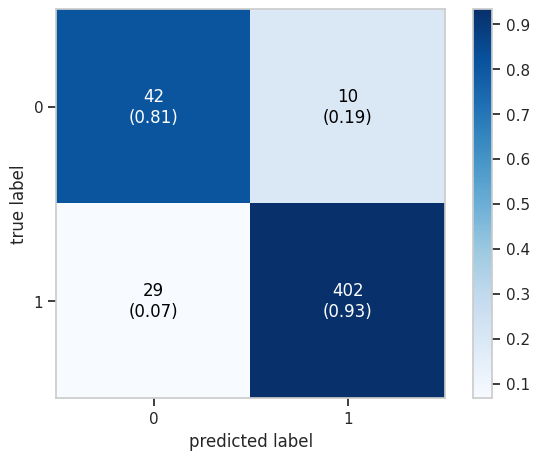

In [ ]:
# Train final model with best features
X_train_gnb_optuna = X_train[selected_features].copy()
X_test_gnb_optuna = X_test[selected_features].copy()

gnb.fit(X_train_gnb_optuna, Y_train)
y_pred_gnb = gnb.predict(X_test_gnb_optuna)

print('Naive Bayes Evaluation')
print('Training set score: {:.4f}'.format(gnb.score(X_train_gnb_optuna, Y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test_gnb_optuna, Y_test)))

# Check MSE & RMSE
mse_gnb = mean_squared_error(Y_test, y_pred_gnb)
print('Mean Squared Error : ' + str(mse_gnb))
rmse_gnb = math.sqrt(mse_gnb)
print('Root Mean Squared Error : ' + str(rmse_gnb))
print('\n')

# Classification report
matrix = classification_report(Y_test, y_pred_gnb)
print(matrix)

# Save the model
joblib.dump(gnb, 'naive_bayes_optuna_model.pkl')

# Calculating and plotting the confusion matrix
cm_gnb = confusion_matrix(Y_test, y_pred_gnb)
plot_confusion_matrix(conf_mat=cm_gnb, show_absolute=True, show_normed=True, colorbar=True)
plt.show()

**Naive Bayes with Selected Sequential Factor**

['1_Ccourse',
 '3_TOEFL_score',
 '4_College_time',
 '5_GPA',
 '7_domicile',
 '8_work',
 '9_live_with_family',
 '10_faculty',
 '11_class',
 '12_departement']

Naive Bayes Evaluation
Training set score: 0.9262
Test set score: 0.9358
Mean Squared Error : 0.06418219461697723
Root Mean Squared Error : 0.253342050629139


              precision    recall  f1-score   support

           1       0.72      0.73      0.73        56
           2       0.96      0.96      0.96       427

    accuracy                           0.94       483
   macro avg       0.84      0.85      0.84       483
weighted avg       0.94      0.94      0.94       483



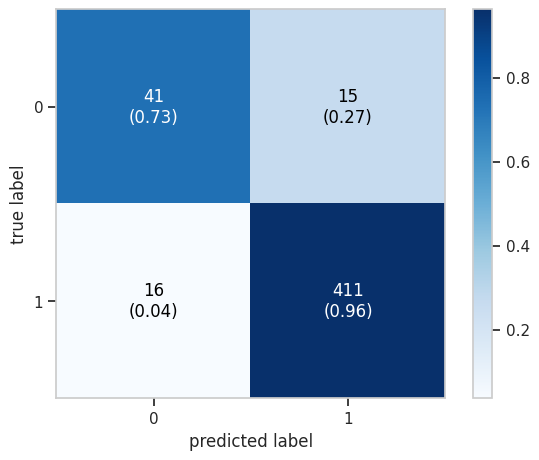

In [39]:
# Stratified kfold over the train set for cross validation
SEED = 32
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
splits = list(skf.split(X_train, Y_train))

# define the model
gnb = GaussianNB()
sfs = SequentialFeatureSelector(gnb, n_features_to_select=10, cv=splits)
sfs.fit(X_train, Y_train);

selected_features = list(X_train.columns[sfs.get_support()])
display(selected_features)

# Train final model with best features
X_train_gnb_sfs = X_train[selected_features].copy()
X_test_gnb_sfs = X_test[selected_features].copy()

gnb.fit(X_train_gnb_sfs, Y_train)
y_pred_gnb = gnb.predict(X_test_gnb_sfs)

print('Naive Bayes Evaluation')
print('Training set score: {:.4f}'.format(gnb.score(X_train_gnb_sfs, Y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test_gnb_sfs, Y_test)))

# Check MSE & RMSE
mse_gnb = mean_squared_error(Y_test, y_pred_gnb)
print('Mean Squared Error : ' + str(mse_gnb))
rmse_gnb = math.sqrt(mse_gnb)
print('Root Mean Squared Error : ' + str(rmse_gnb))
print('\n')

# Classification report
matrix = classification_report(Y_test, y_pred_gnb)
print(matrix)

# Save the model
joblib.dump(gnb, 'naive_bayes_sfs_model.pkl')

# Calculating and plotting the confusion matrix
cm_gnb = confusion_matrix(Y_test, y_pred_gnb)
plot_confusion_matrix(conf_mat=cm_gnb, show_absolute=True, show_normed=True, colorbar=True)
plt.show()

**Naive Bayes with Chi-squared Feature Selection**

Naive Bayes Evaluation
Training set score: 0.9208
Test set score: 0.9275
Mean Squared Error : 0.07246376811594203
Root Mean Squared Error : 0.26919095102908275


              precision    recall  f1-score   support

           1       0.67      0.73      0.70        56
           2       0.96      0.95      0.96       427

    accuracy                           0.93       483
   macro avg       0.82      0.84      0.83       483
weighted avg       0.93      0.93      0.93       483



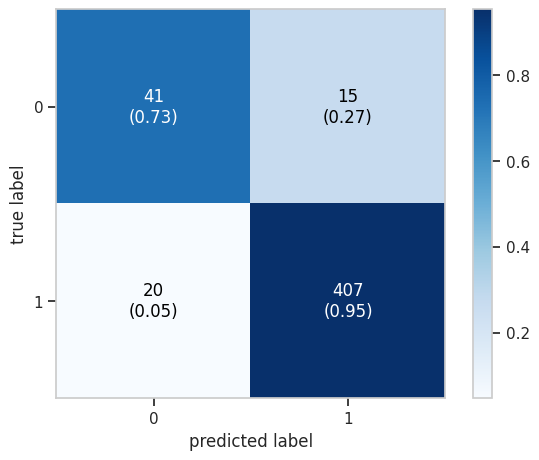

In [42]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import joblib
import math

# Normalize the data to make it non-negative
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Select the best K features using chi-square
k = 10  # Set number of top features to select
chi2_selector = SelectKBest(score_func=chi2, k=k)
X_train_selected = chi2_selector.fit_transform(X_train_scaled, Y_train)
X_test_selected = chi2_selector.transform(X_test_scaled)

# Define the model
gnb = GaussianNB()

# Train the model
gnb.fit(X_train_selected, Y_train)

# Make predictions
y_pred_gnb = gnb.predict(X_test_selected)

# Evaluation
print('Naive Bayes Evaluation')
print('Training set score: {:.4f}'.format(gnb.score(X_train_selected, Y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test_selected, Y_test)))

# Check MSE & RMSE
mse_gnb = mean_squared_error(Y_test, y_pred_gnb)
print('Mean Squared Error : ' + str(mse_gnb))
rmse_gnb = math.sqrt(mean_squared_error(Y_test, y_pred_gnb))
print('Root Mean Squared Error : ' + str(rmse_gnb))
print('\n')

# Classification report
matrix = classification_report(Y_test, y_pred_gnb)
print(matrix)

# Save the model
joblib.dump(gnb, 'naive_bayes_chi_model.pkl')

# Calculating and plotting the confusion matrix
cm_gnb = confusion_matrix(Y_test, y_pred_gnb)
plot_confusion_matrix(conf_mat=cm_gnb, show_absolute=True,
                      show_normed=True,
                      colorbar=True)
plt.show()

# **XGBoost**

XGBoost Evaluation
Training set score: 1.0000
Test set score: 0.9565
Mean Squared Error : 0.043478260869565216
Root Mean Squared Error : 0.20851441405707477


              precision    recall  f1-score   support

           0       0.80      0.84      0.82        56
           1       0.98      0.97      0.98       427

    accuracy                           0.96       483
   macro avg       0.89      0.91      0.90       483
weighted avg       0.96      0.96      0.96       483



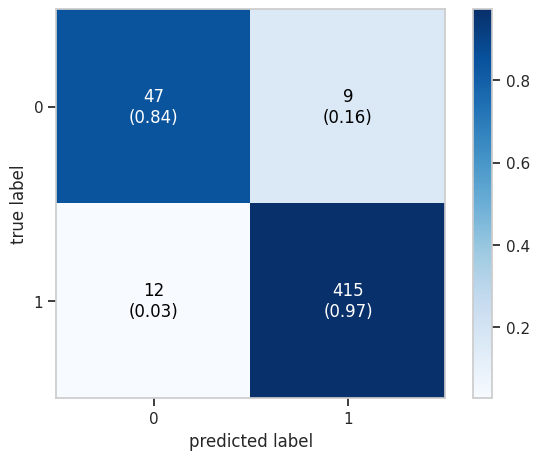

In [43]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels to 0 and 1
le = LabelEncoder()
Y = le.fit_transform(df["status"])

# Split the dataset again
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size=0.3, random_state=31)

# Train the model
xg = XGBClassifier(eval_metric='error', learning_rate=0.1, enable_categorical=True)
xg.fit(X_train, Y_train)

# Predict and evaluate
y_pred_xg = xg.predict(X_test)
print('XGBoost Evaluation')
print('Training set score: {:.4f}'.format(xg.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(xg.score(X_test, Y_test)))

# Check MSE & RMSE
mse_xg = mean_squared_error(Y_test, y_pred_xg)
print('Mean Squared Error : ' + str(mse_xg))
rmse_xg = math.sqrt(mean_squared_error(Y_test, y_pred_xg))
print('Root Mean Squared Error : ' + str(rmse_xg))
print('\n')

matrix = classification_report(Y_test, y_pred_xg)
print(matrix)

# Save the model
joblib.dump(xg, 'xgboost_model.pkl')

# Plot confusion matrix
cm_xg = confusion_matrix(Y_test, y_pred_xg)
plot_confusion_matrix(conf_mat=cm_xg, show_absolute=True,
                      show_normed=True, colorbar=True)
plt.show()

**XGBoost with Optuna**

In [44]:
# Assuming X_train and X_test are numpy arrays, convert them to pandas DataFrame
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
Y_train = pd.DataFrame(Y_train)
Y_test = pd.DataFrame(Y_test)
SEED = 32

# Define feature selection class
class FeatureSelectionOptuna:
    def __init__(self, model, loss_fn, features, X, y, splits, penalty):
        self.model = model
        self.loss_fn = loss_fn
        self.features = features
        self.X = X
        self.y = y
        self.splits = splits
        self.penalty = penalty

    def __call__(self, trial):
        selected_features = [f for f in self.features if trial.suggest_categorical(f, [True, False])]
        if len(selected_features) == 0:
            return float('inf')

        X_selected = self.X[selected_features]

        kf = StratifiedKFold(n_splits=self.splits)
        scores = []

        for train_index, valid_index in kf.split(X_selected, self.y):
            X_train_fold, X_valid_fold = X_selected.iloc[train_index], X_selected.iloc[valid_index]
            y_train_fold, y_valid_fold = self.y.iloc[train_index], self.y.iloc[valid_index]

            self.model.fit(X_train_fold, y_train_fold)
            y_pred_valid = self.model.predict(X_valid_fold)
            score = self.loss_fn(y_valid_fold, y_pred_valid)
            scores.append(score)

        return np.mean(scores) + self.penalty * len(selected_features)

# Define the model
xg = XGBClassifier(random_state=SEED,enable_categorical=True)

# Define loss function
def loss_fn(y_true, y_pred):
    return 1 - accuracy_score(y_true, y_pred)

# Define other parameters
features = list(X_train.columns)
sampler = TPESampler(seed=SEED)
study = optuna.create_study(direction="minimize", sampler=sampler)

# We first try the model using all features
default_features = {ft: True for ft in features}
study.enqueue_trial(default_features)

study.optimize(FeatureSelectionOptuna(
                         model=xg,
                         loss_fn=loss_fn,
                         features=features,
                         X=X_train,
                         y=Y_train,
                         splits=5,
                         penalty=1e-4,
                         ), n_trials=20)

# Get the best features
best_trial = study.best_trial
selected_features = [f for f in features if best_trial.params[f]]
display(X_train)
selected_features

[I 2025-01-13 02:10:49,145] A new study created in memory with name: no-name-ec7f5b60-9be1-4deb-9e27-8dc2f0f28c40
[I 2025-01-13 02:10:49,546] Trial 0 finished with value: 0.04746190476190475 and parameters: {'1_Ccourse': True, '2_CCourse_good': True, '3_TOEFL_score': True, '4_College_time': True, '5_GPA': True, '6_Academic_Leave': True, '7_domicile': True, '8_work': True, '9_live_with_family': True, '10_faculty': True, '11_class': True, '12_departement': True}. Best is trial 0 with value: 0.04746190476190475.
[I 2025-01-13 02:10:49,888] Trial 1 finished with value: 0.06466349206349208 and parameters: {'1_Ccourse': True, '2_CCourse_good': False, '3_TOEFL_score': False, '4_College_time': False, '5_GPA': True, '6_Academic_Leave': False, '7_domicile': True, '8_work': False, '9_live_with_family': True, '10_faculty': False, '11_class': True, '12_departement': True}. Best is trial 0 with value: 0.04746190476190475.
[I 2025-01-13 02:10:50,086] Trial 2 finished with value: 0.12831111111111115 a

1_Ccourse  2_CCourse_good  3_TOEFL_score  4_College_time     5_GPA  \
327    4.990433        4.990433       6.240276        2.079442  1.184790   
1620   4.976734        4.976734       6.124683        2.079442  1.249902   
1311   4.969813        4.969813       6.200509        2.197225  1.098612   
586    4.969813        4.969813       6.180017        1.945910  1.266948   
1771   4.969813        4.969813       6.131226        1.945910  1.275363   
...         ...             ...            ...             ...       ...   
902    4.969813        4.969813       6.124683        2.079442  1.169381   
665    4.976734        4.976734       6.200509        2.079442  1.247032   
974    3.663562        2.890372       6.157050        0.000000  0.398776   
16     4.934474        4.934474       6.115892        2.639057  1.169381   
787    4.976734        4.976734       6.115892        2.079442  1.208960   

      6_Academic_Leave 7_domicile 8_work 9_live_with_family 10_faculty  \
327           1.136011          4      1                  1          4   
1620          1.136011          4      1                  1          6   
1311          1.136011          4      1                  1          3   
586           1.136011          4      2                  1          4   
1771          1.136011          4      1                  1          6   
...                ...        ...    ...                ...        ...   
902           1.136011          5      1                  2          5   
665           1.136011          4      1                  1          4   
974           1.136011          4      2                  1          5   
16            1.136011          3      1                  2          4   
787           1.136011          4      1                  1          4   

     11_class 12_departement  
327      2015             42  
1620     2016             63  
1311     2015             32  
586      2014             42  
1771     2015             64  
...       ...            ...  
902      2015             52  
665      2014             41  
974      2016             53  
16       2016             42  
787      2016             41  

[1124 rows x 12 columns]

['1_Ccourse',
 '2_CCourse_good',
 '3_TOEFL_score',
 '4_College_time',
 '6_Academic_Leave',
 '7_domicile',
 '9_live_with_family',
 '10_faculty',
 '12_departement']

XGBoost Evaluation
Training set score: 0.9991
Test set score: 0.9607
Mean Squared Error : 0.039337474120082816
Root Mean Squared Error : 0.19833676946063938


              precision    recall  f1-score   support

           0       0.80      0.88      0.84        56
           1       0.98      0.97      0.98       427

    accuracy                           0.96       483
   macro avg       0.89      0.92      0.91       483
weighted avg       0.96      0.96      0.96       483



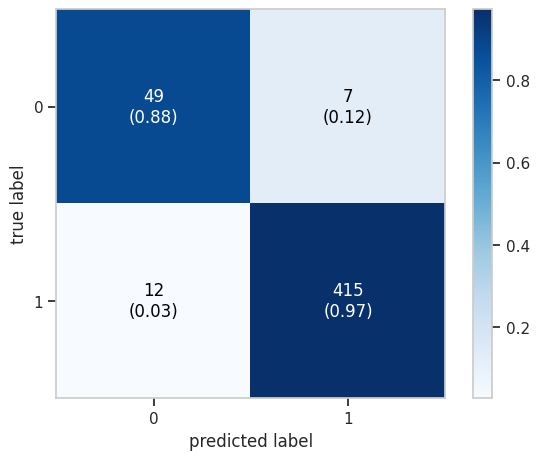

Combinations of features that result in y_pred_xg = 1:


1_Ccourse  2_CCourse_good  3_TOEFL_score  4_College_time  \
831    4.990433        4.990433       6.124683        2.079442   
298    4.990433        4.990433       6.115892        1.945910   
318    4.990433        4.990433       6.228511        1.945910   
1681   2.995732        4.794781       6.157050        0.000000   
1684   4.983607        4.983607       6.124683        2.079442   
...         ...             ...            ...             ...   
1574   4.976734        4.976734       6.253829        1.945910   
584    4.969813        4.969813       6.124683        2.079442   
268    4.990433        4.990433       6.180017        2.302585   
1229   4.990433        4.990433       6.109248        2.079442   
605    4.969813        4.969813       6.124683        2.197225   

      6_Academic_Leave 7_domicile 9_live_with_family 10_faculty 12_departement  
831           1.136011          4                  1          2             21  
298           1.136011          4                  1          4             42  
318           1.136011          4                  1          4             42  
1681          1.136011          1                  2          6             62  
1684          1.136011          4                  1          6             62  
...                ...        ...                ...        ...            ...  
1574          1.136011          4                  1          6             61  
584           1.136011          1                  1          4             42  
268           0.693147          4                  1          4             42  
1229          1.136011          4                  1          3             33  
605           1.136011          4                  1          4             42  

[422 rows x 9 columns]

In [45]:
# Train final model with best features
X_train_xg_optuna = X_train[selected_features].copy()
X_test_xg_optuna = X_test[selected_features].copy()

xg.fit(X_train_xg_optuna, Y_train)
y_pred_xg = xg.predict(X_test_xg_optuna)

print('XGBoost Evaluation')
print('Training set score: {:.4f}'.format(xg.score(X_train_xg_optuna, Y_train)))
print('Test set score: {:.4f}'.format(xg.score(X_test_xg_optuna, Y_test)))

# Check MSE & RMSE
mse_xg = mean_squared_error(Y_test, y_pred_xg)
print('Mean Squared Error : ' + str(mse_xg))
rmse_xg = math.sqrt(mse_xg)
print('Root Mean Squared Error : ' + str(rmse_xg))
print('\n')

# Classification report
matrix = classification_report(Y_test, y_pred_xg)
print(matrix)

# Save the model
joblib.dump(xg, 'xgboost_optuna_model.pkl')

# Calculating and plotting the confusion matrix
cm_xg = confusion_matrix(Y_test, y_pred_xg)
plot_confusion_matrix(conf_mat=cm_xg, show_absolute=True, show_normed=True, colorbar=True)
plt.show()

# Identify and display combinations of features that result in y_pred_xg = 1
combinations_zero = X_test_xg_optuna[y_pred_xg == 1]
print("Combinations of features that result in y_pred_xg = 1:")
display(combinations_zero)

**XGBoost with Selected Sequential Factor**

Selected Features: ['1_Ccourse', '2_CCourse_good', '3_TOEFL_score', '4_College_time', '5_GPA', '6_Academic_Leave', '8_work', '9_live_with_family', '10_faculty', '12_departement']
XGBoost Evaluation
Training set score: 0.9973
Test set score: 0.9441
Mean Squared Error : 0.055900621118012424
Root Mean Squared Error : 0.23643312187173018


              precision    recall  f1-score   support

           0       0.76      0.86      0.81        66
           1       0.98      0.96      0.97       417

    accuracy                           0.94       483
   macro avg       0.87      0.91      0.89       483
weighted avg       0.95      0.94      0.95       483



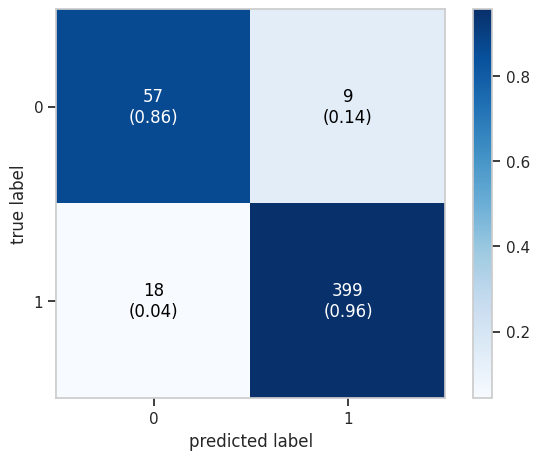

In [50]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import joblib
import math

# Encode target labels to 0 and 1
le = LabelEncoder()
Y = le.fit_transform(df["status"])

# Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=32)

# Stratified k-fold cross-validation
SEED = 32
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
splits = list(skf.split(X_train, Y_train))

# Define a RandomForest model for feature selection
rf = RandomForestClassifier(random_state=SEED)
sfs = SequentialFeatureSelector(
    rf,
    n_features_to_select=10,
    cv=splits,
    direction='forward',
    scoring='accuracy',
    n_jobs=-1
)
sfs.fit(X_train, Y_train)

# Get selected features
selected_features = list(X_train.columns[sfs.get_support()])
print("Selected Features:", selected_features)

# Filter training and testing sets by selected features
X_train_selected = X_train[selected_features].copy()
X_test_selected = X_test[selected_features].copy()

# Train XGBoost with selected features
xg = XGBClassifier(eval_metric='error', learning_rate=0.1, enable_categorical=True, random_state=SEED)
xg.fit(X_train_selected, Y_train)

# Predict and evaluate
y_pred_xg = xg.predict(X_test_selected)

print('XGBoost Evaluation')
print('Training set score: {:.4f}'.format(xg.score(X_train_selected, Y_train)))
print('Test set score: {:.4f}'.format(xg.score(X_test_selected, Y_test)))

# Check MSE & RMSE
mse_xg = mean_squared_error(Y_test, y_pred_xg)
print('Mean Squared Error : ' + str(mse_xg))
rmse_xg = math.sqrt(mse_xg)
print('Root Mean Squared Error : ' + str(rmse_xg))
print('\n')

# Classification report
matrix = classification_report(Y_test, y_pred_xg)
print(matrix)

# Save the model
joblib.dump(xg, 'xgboost_sfs_model.pkl')

# Calculating and plotting the confusion matrix
cm_xg = confusion_matrix(Y_test, y_pred_xg)
plot_confusion_matrix(conf_mat=cm_xg, show_absolute=True, show_normed=True, colorbar=True)
plt.show()

**XGBoost with Chi-Squared**

XGBoost Evaluation
Training set score: 0.9964
Test set score: 0.9669
Mean Squared Error : 0.033126293995859216
Root Mean Squared Error : 0.18200630207731602


              precision    recall  f1-score   support

           0       0.82      0.91      0.86        56
           1       0.99      0.97      0.98       427

    accuracy                           0.97       483
   macro avg       0.91      0.94      0.92       483
weighted avg       0.97      0.97      0.97       483



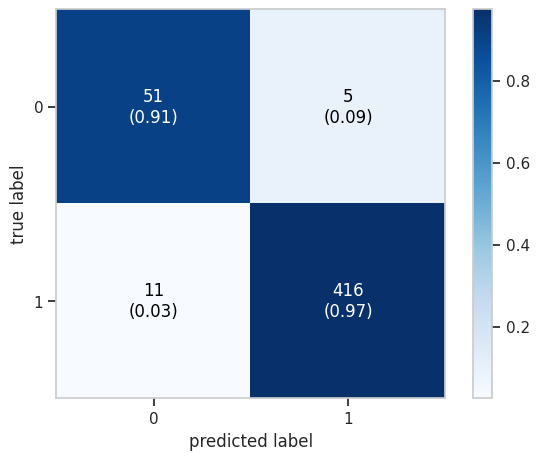

Selected feature indices: [0 1 2 3 4 5 6 7 8 9]


In [52]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from xgboost import XGBClassifier
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import joblib
import math

# Encode target labels to 0 and 1
le = LabelEncoder()
Y = le.fit_transform(df["status"])

# Scale features to non-negative range
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # Transform all features to range [0, 1]

# Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=31)

# Apply Chi-Squared feature selection
selector = SelectKBest(chi2, k=10)  # Select top 10 features
X_train_selected = selector.fit_transform(X_train, Y_train)
X_test_selected = selector.transform(X_test)

# Train the model
xg = XGBClassifier(eval_metric='error', learning_rate=0.1, enable_categorical=True, random_state=31)
xg.fit(X_train_selected, Y_train)

# Predict and evaluate
y_pred_xg = xg.predict(X_test_selected)

print('XGBoost Evaluation')
print('Training set score: {:.4f}'.format(xg.score(X_train_selected, Y_train)))
print('Test set score: {:.4f}'.format(xg.score(X_test_selected, Y_test)))

# Check MSE & RMSE
mse_xg = mean_squared_error(Y_test, y_pred_xg)
print('Mean Squared Error : ' + str(mse_xg))
rmse_xg = math.sqrt(mse_xg)
print('Root Mean Squared Error : ' + str(rmse_xg))
print('\n')

# Classification report
matrix = classification_report(Y_test, y_pred_xg)
print(matrix)

# Save the model
joblib.dump(xg, 'xgboost_chi_squared_model.pkl')

# Plot confusion matrix
cm_xg = confusion_matrix(Y_test, y_pred_xg)
plot_confusion_matrix(conf_mat=cm_xg, show_absolute=True, show_normed=True, colorbar=True)
plt.show()

# Display selected feature indices
selected_features = selector.get_support(indices=True)
print(f"Selected feature indices: {selected_features}")